Upload data here

In [ ]:
import pandas as pd
df=pd.read_csv('heart_failure_clinical_records_dataset.csv')
print(df.head())

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

Scan variables to see if the data looks appropriate for k-means or if we may need to transform features because of skewness.

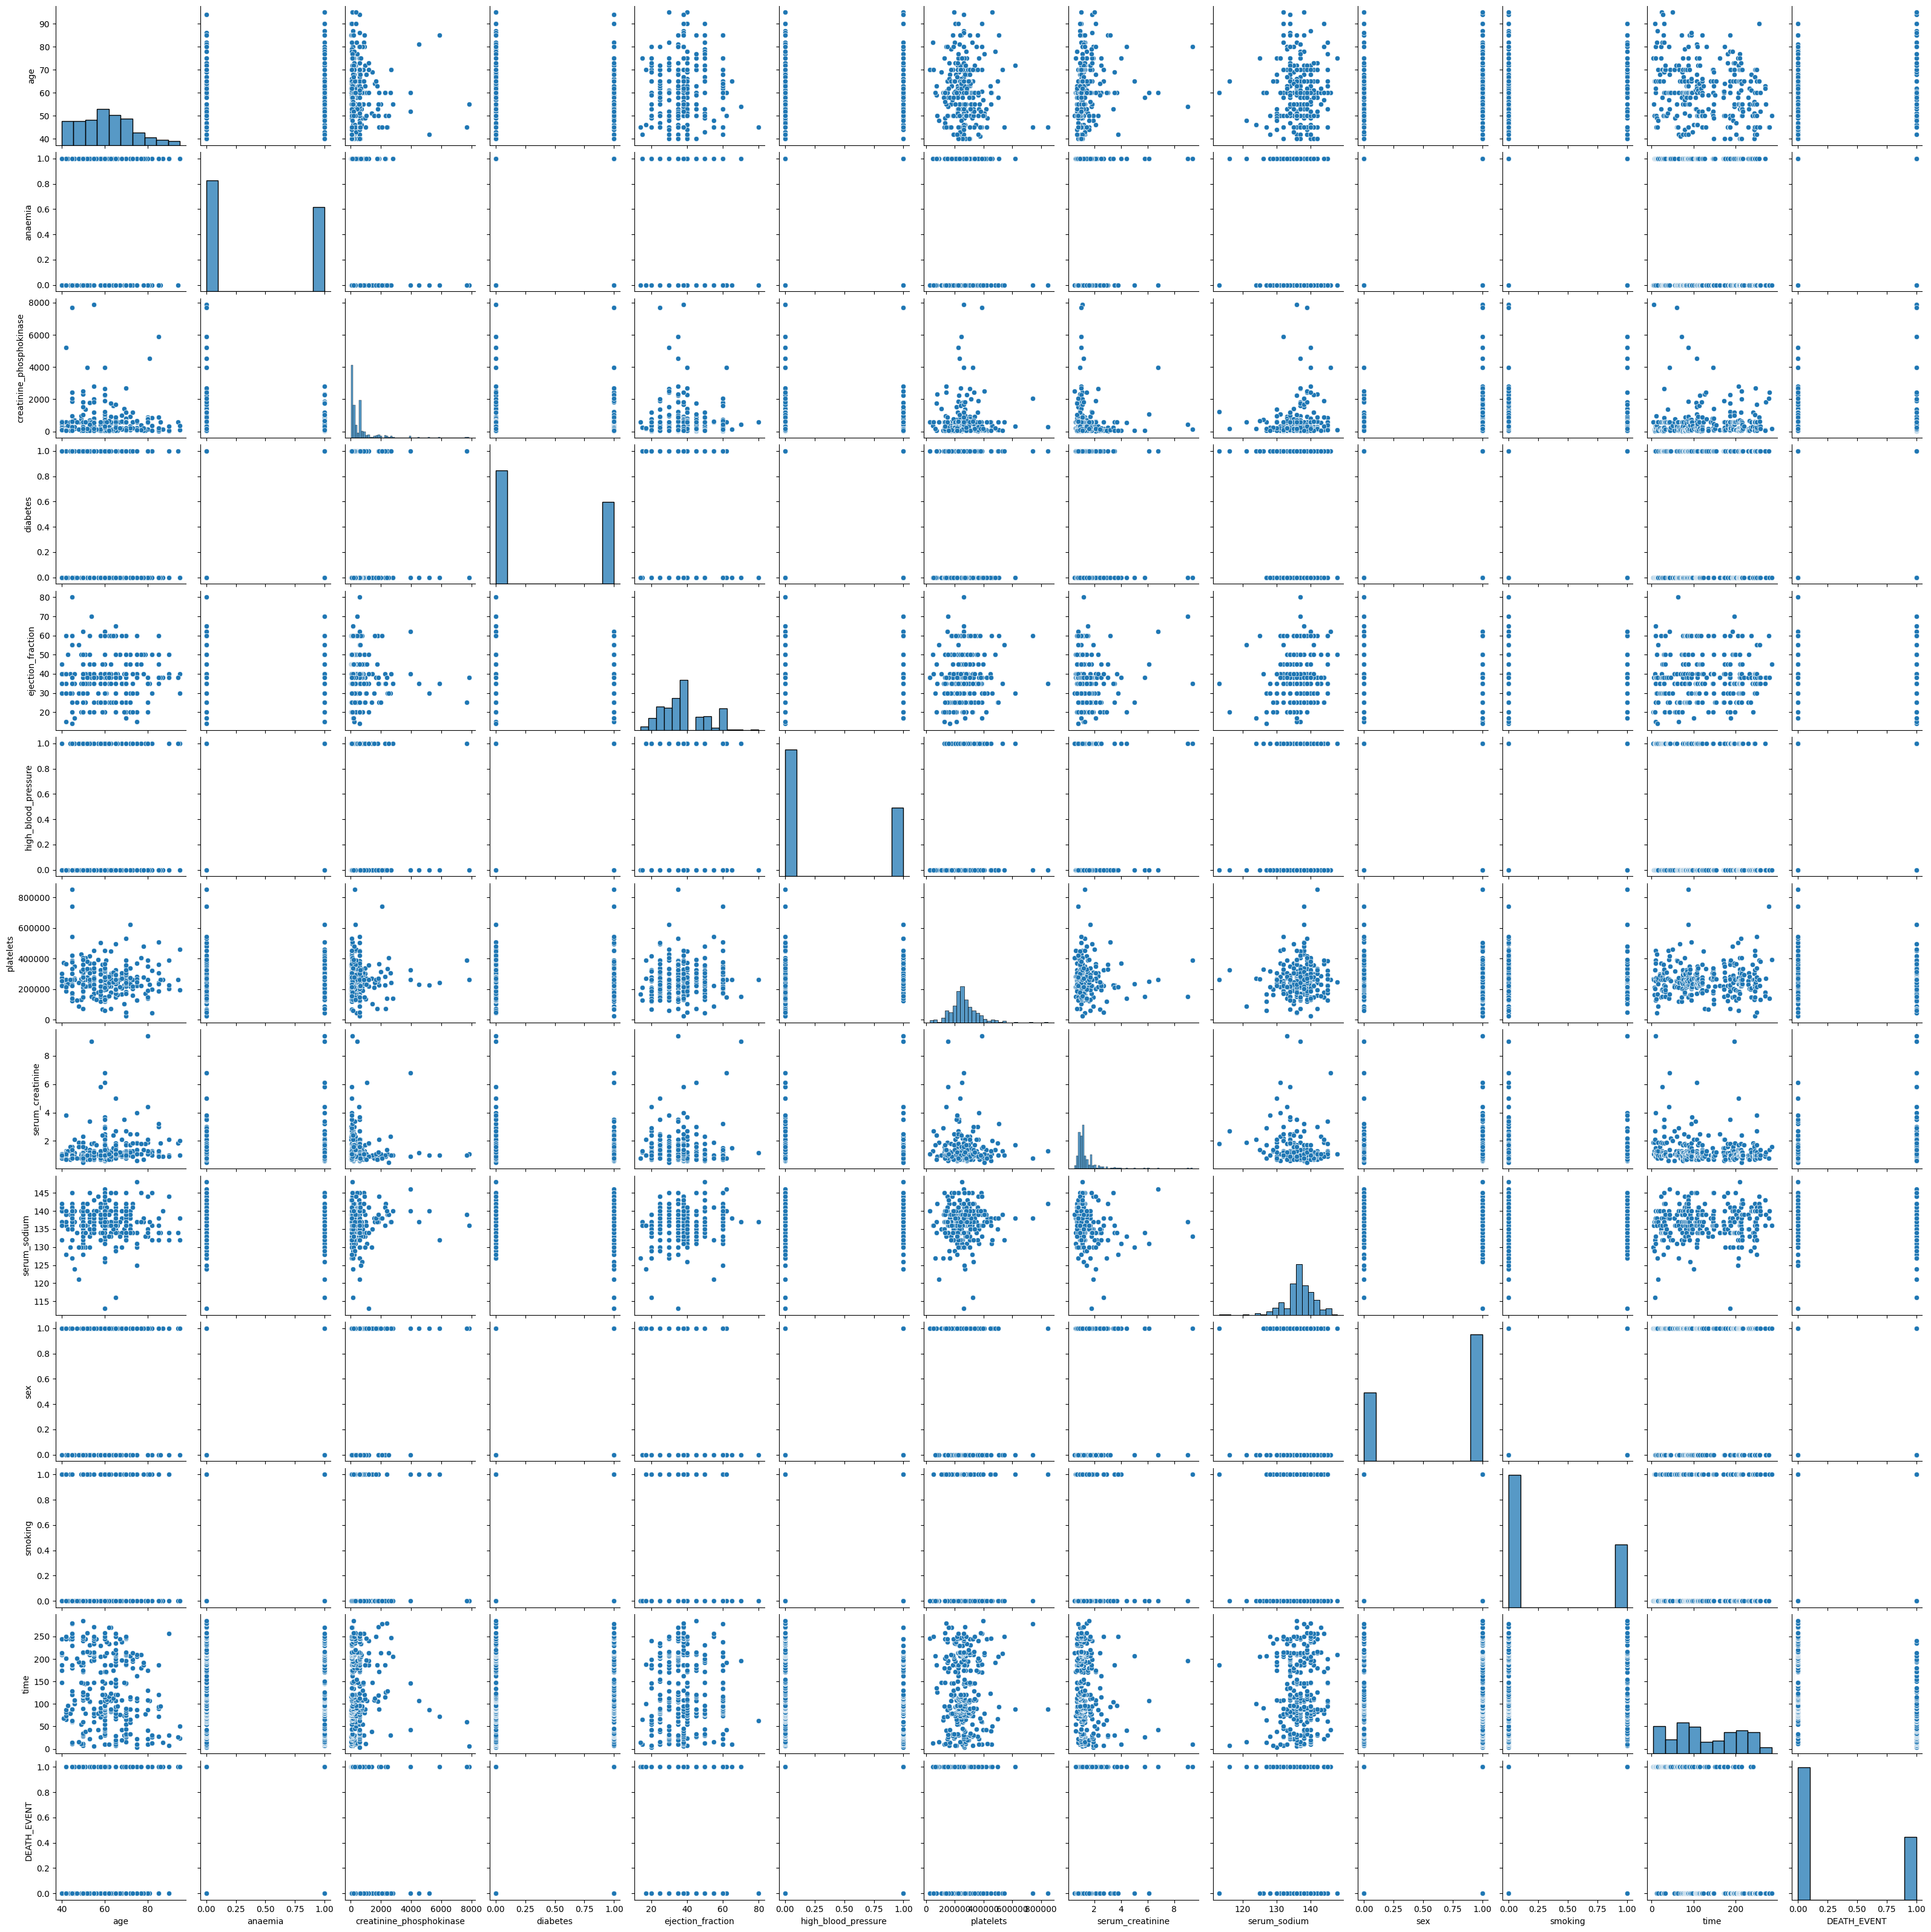

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()


# There are a couple of distributions that are skewed that we need to take care of before we begin. We will log(x)+1 transform each of these variables(creatinine phosphokinase, serum creatinine).

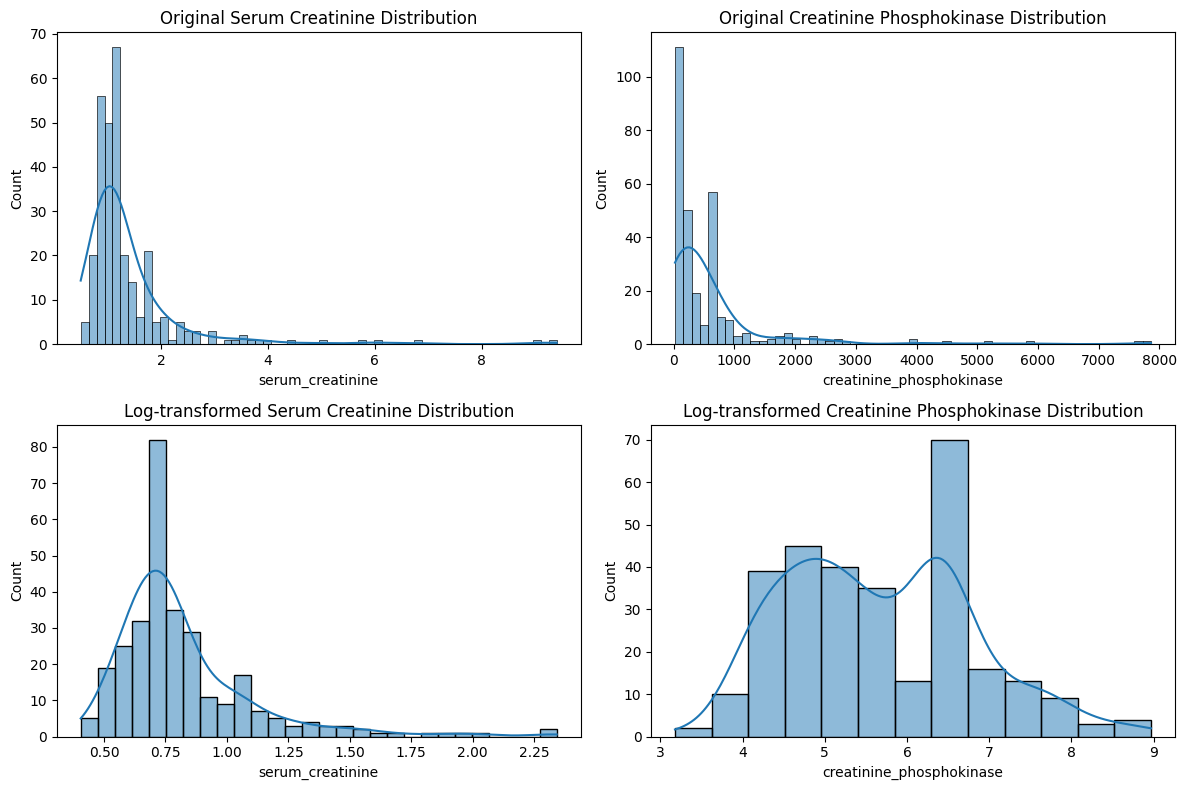

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


binary_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
continuous_cols = ['age', 'ejection_fraction', 'platelets', 'creatinine_phosphokinase', 'serum_creatinine', 'time']
combined_cols = binary_cols + continuous_cols
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df_combined = df[combined_cols].copy()

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Original distributions
sns.histplot(df_combined['serum_creatinine'], kde=True, ax=ax[0, 0]).set_title('Original Serum Creatinine Distribution')
sns.histplot(df_combined['creatinine_phosphokinase'], kde=True, ax=ax[0, 1]).set_title('Original Creatinine Phosphokinase Distribution')

# Log-transformed distributions
# Add 1 to avoid log(0) which is undefined
sns.histplot(np.log1p(df_combined['serum_creatinine']), kde=True, ax=ax[1, 0]).set_title('Log-transformed Serum Creatinine Distribution')
sns.histplot(np.log1p(df_combined['creatinine_phosphokinase']), kde=True, ax=ax[1, 1]).set_title('Log-transformed Creatinine Phosphokinase Distribution')

plt.tight_layout()
plt.show()



# Next I want to visualize the observations across each feature. That is, do the observations look weakly correlated with each other, but have a small euclidean distance between them? Or do they have a large euclidean distance between then but highly correlated? Looking at the figure below there appears to be high correlation but a large euclidean distance accross variables. We will neeed to scale these variables first.

Check the variance of each of the features below. Plalets have a high variance, and if we don't scale this before performing K-means, the resulting PCA scatterplot will be dominated by this variable.

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  log_creatinine_phosphokinase  \
0        0     4            1            

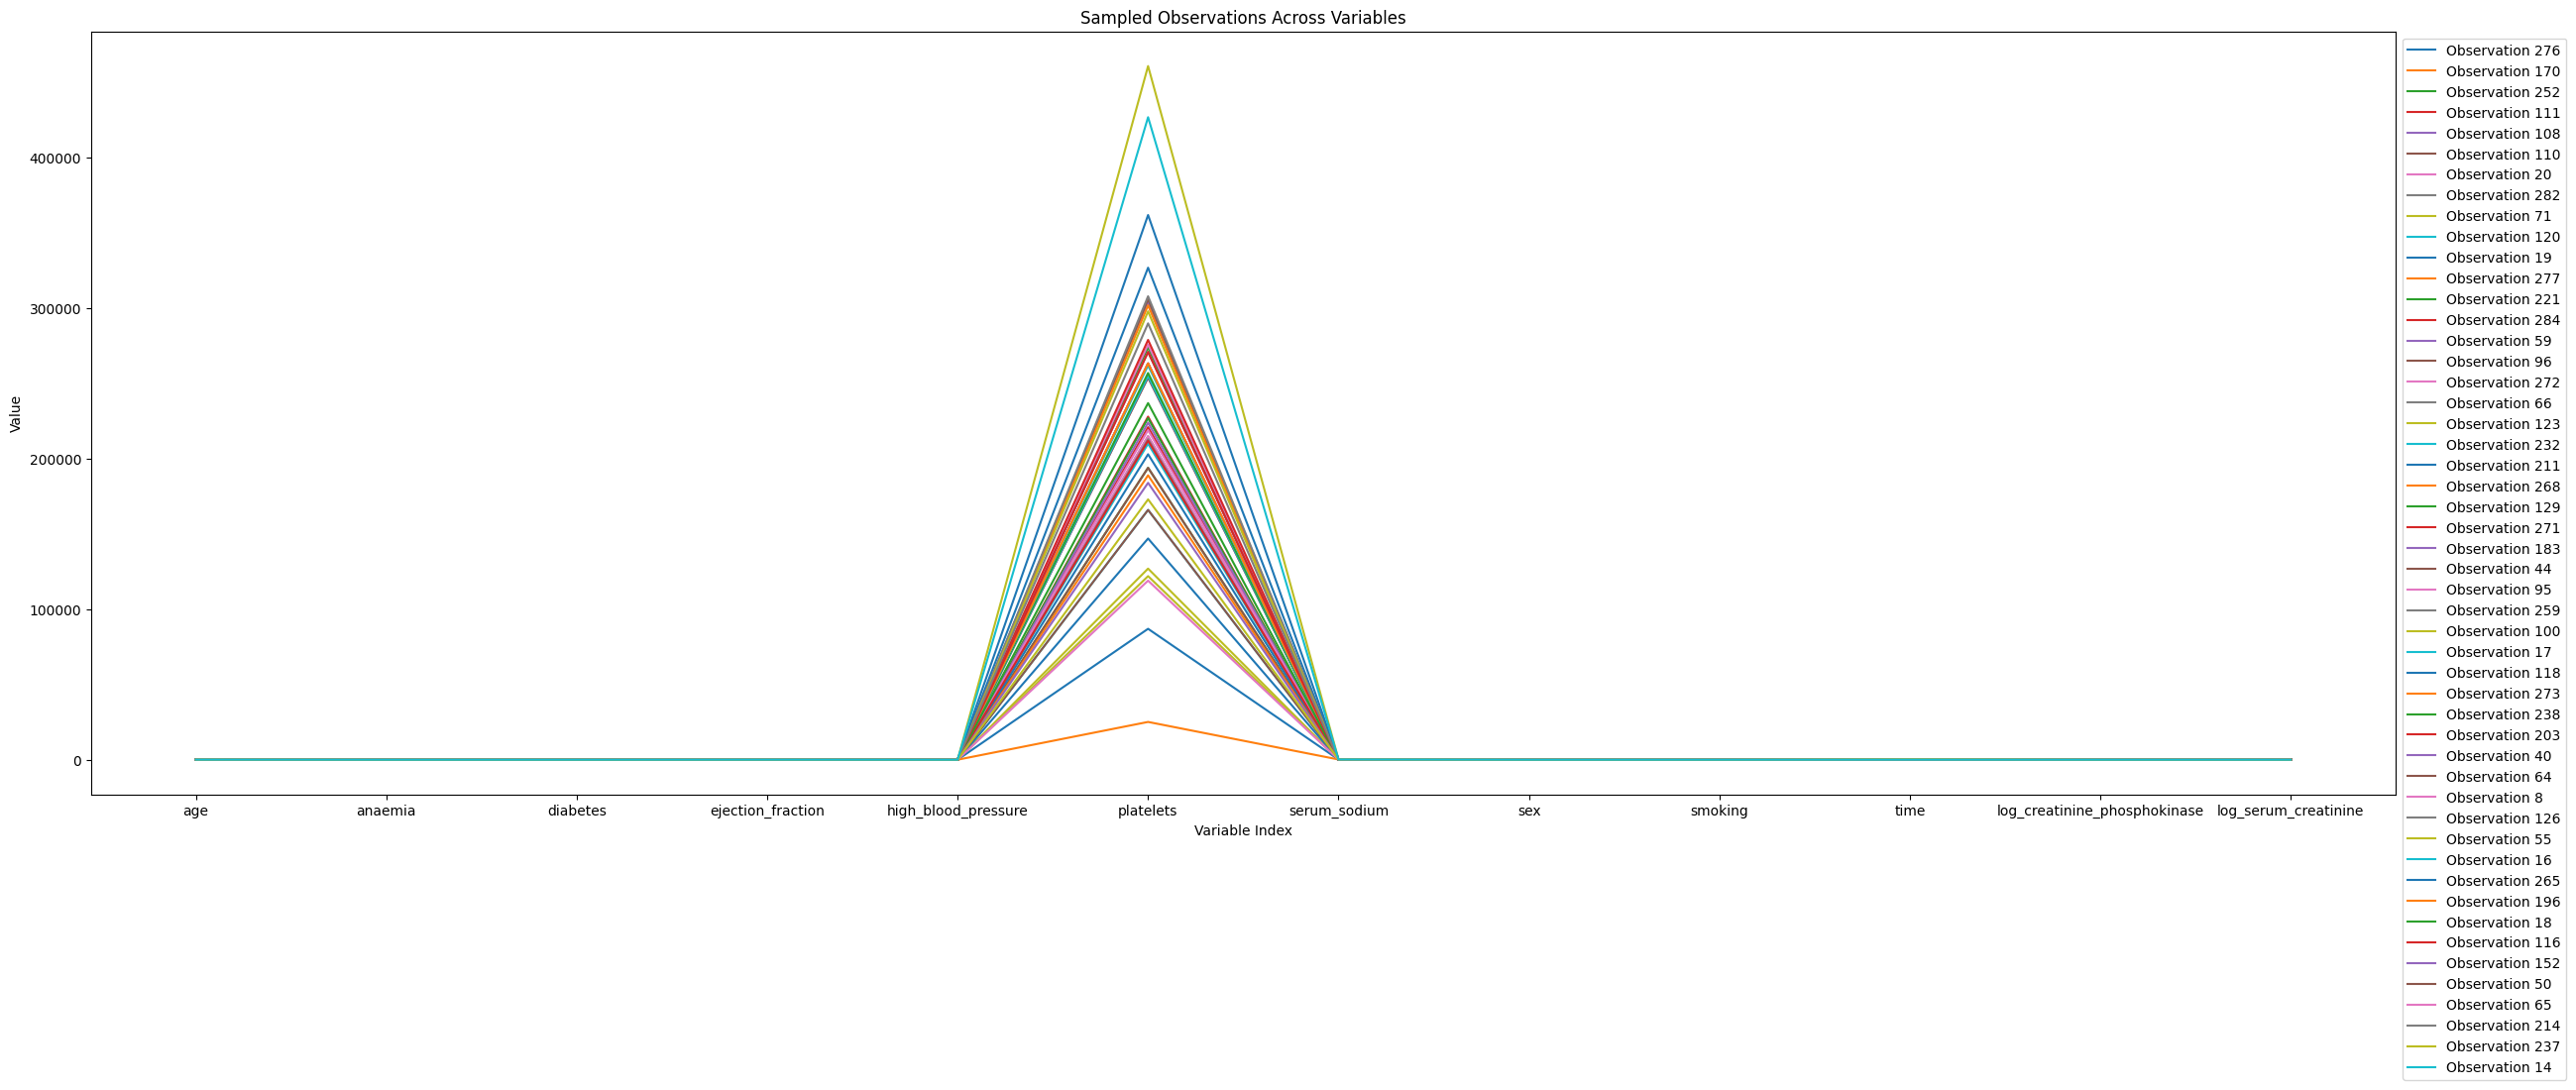

age                             1.414865e+02
anaemia                         2.461224e-01
diabetes                        2.441023e-01
ejection_fraction               1.400635e+02
high_blood_pressure             2.286144e-01
platelets                       9.565669e+09
serum_sodium                    1.946996e+01
sex                             2.286144e-01
smoking                         2.187156e-01
time                            6.023965e+03
log_creatinine_phosphokinase    1.275756e+00
log_serum_creatinine            8.164347e-02
dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df2= df.copy()

# Log transforming skewed variables
df2['log_creatinine_phosphokinase'] = np.log1p(df2['creatinine_phosphokinase'])
df2['log_serum_creatinine'] = np.log1p(df2['serum_creatinine'])
print(df2.head())
df2 = df2.drop(columns=['creatinine_phosphokinase', 'serum_creatinine','DEATH_EVENT'])
cont_cols_log=['age', 'ejection_fraction', 'platelets', 'log_creatinine_phosphokinase', 'log_serum_creatinine','serum_sodium', 'time']


# Sample a subset of observations, e.g., 50
sample_df2= df2.sample(50)

plt.figure(figsize=(30, 10))

# Iterate through each row in the sample and plot
for index, row in sample_df2.iterrows():
    plt.plot(row, label=f'Observation {index}')

plt.title('Sampled Observations Across Variables')
plt.xlabel('Variable Index')
plt.ylabel('Value')
plt.legend(loc="upper left", bbox_to_anchor=(1,1))  # place the legend outside the plot
plt.show()
print(df2.var())

#In order to avoid inversion, we will scale the variables to values between [0,1] instead of standardizing to mean=0 and std=1.

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  log_creatinine_phosphokinase  \
0        0     4            1            

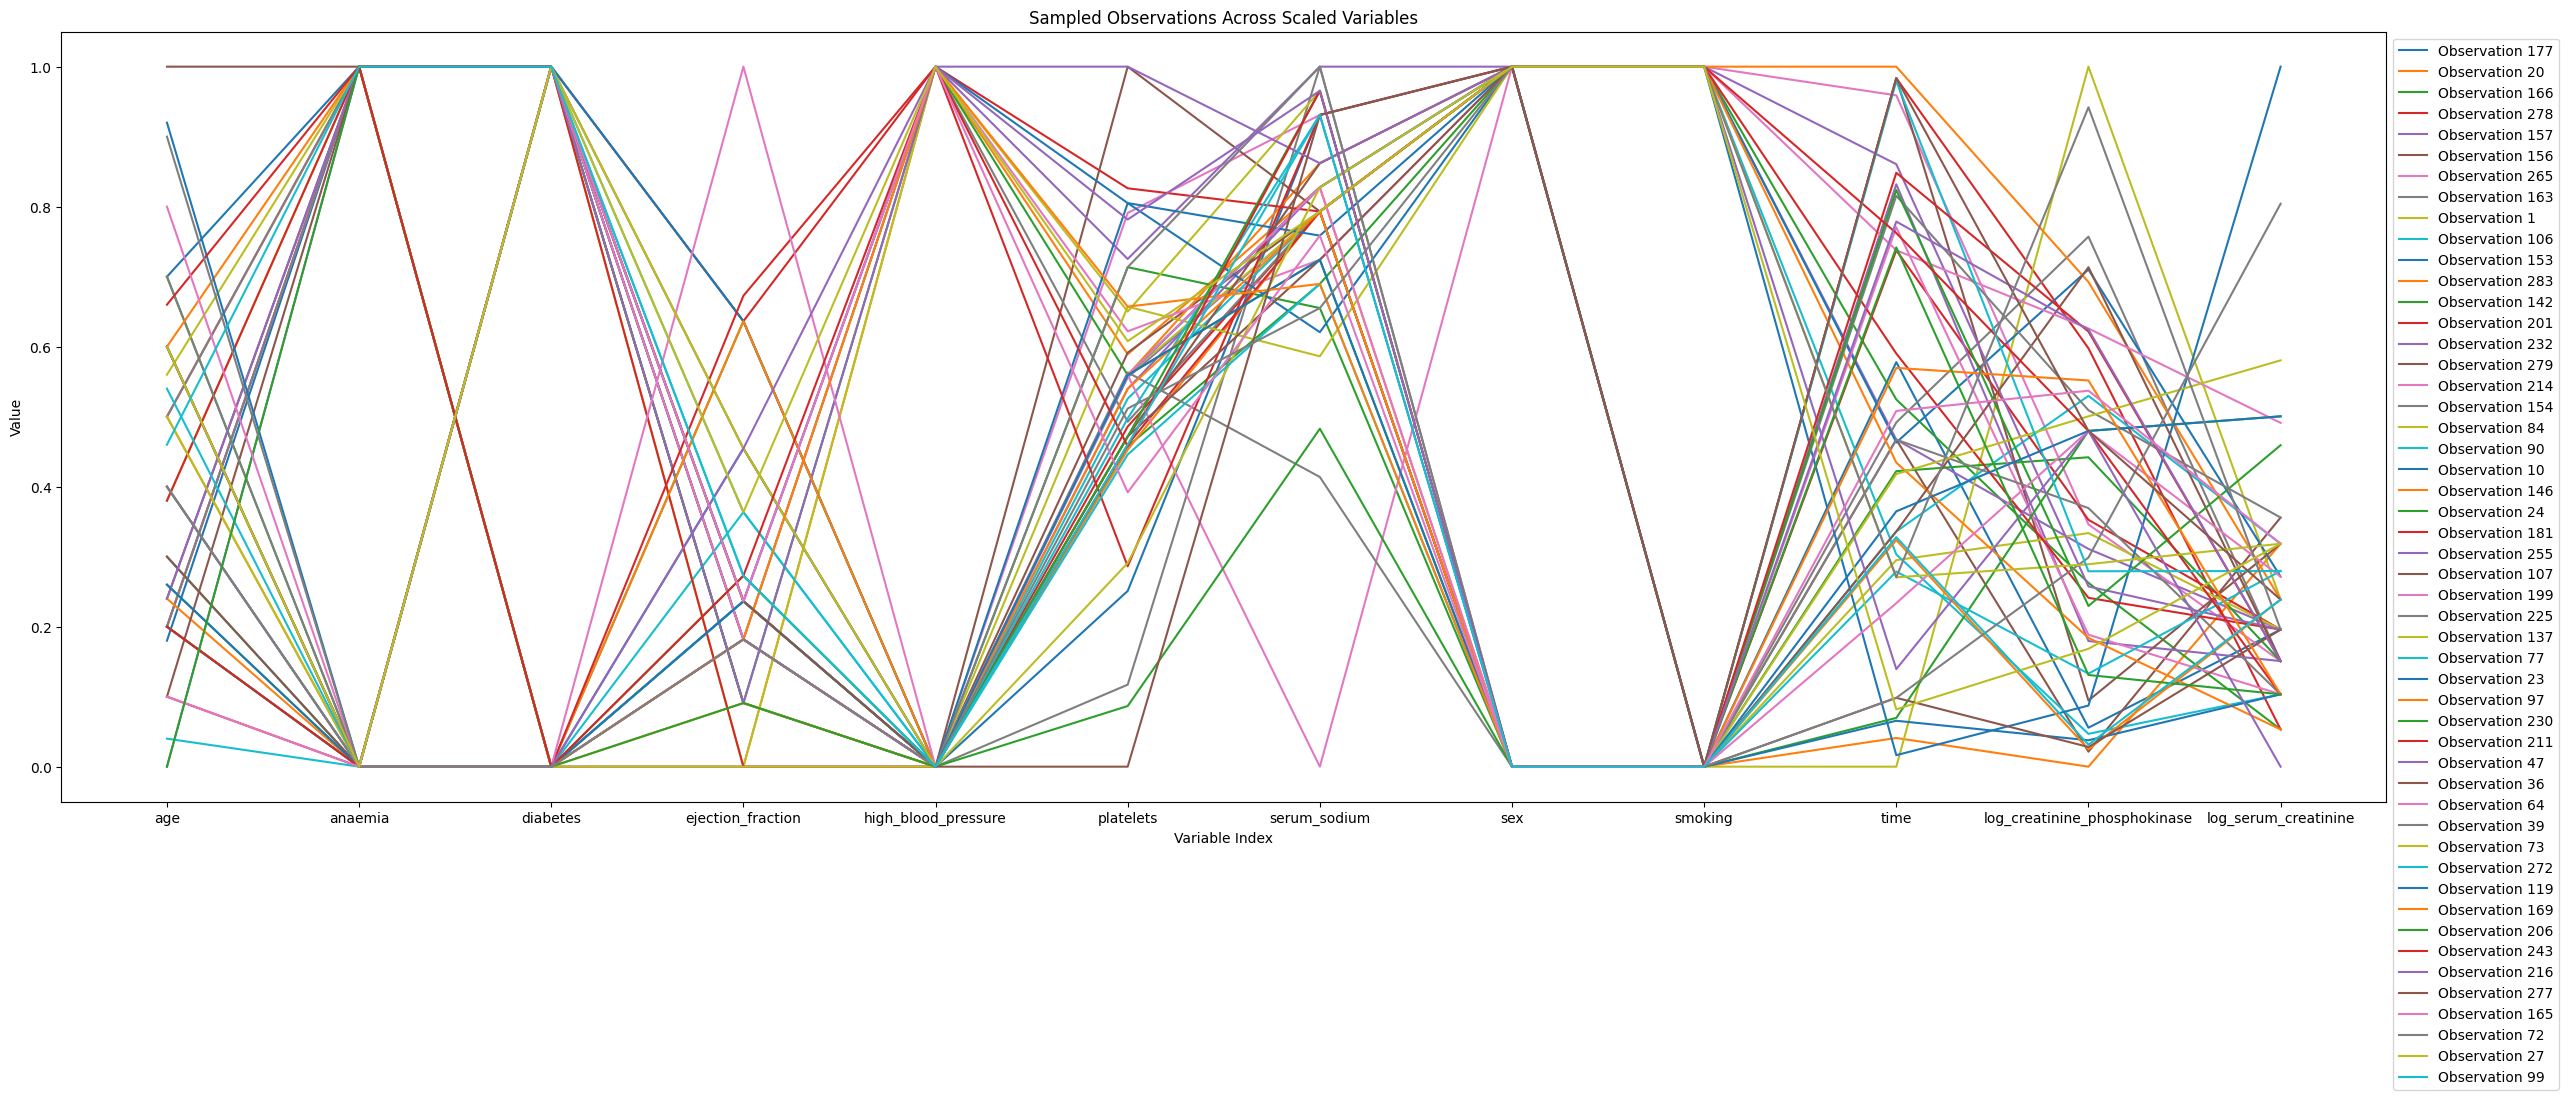

age                             1.414865e+02
anaemia                         2.461224e-01
diabetes                        2.441023e-01
ejection_fraction               1.400635e+02
high_blood_pressure             2.286144e-01
platelets                       9.565669e+09
serum_sodium                    1.946996e+01
sex                             2.286144e-01
smoking                         2.187156e-01
time                            6.023965e+03
log_creatinine_phosphokinase    1.275756e+00
log_serum_creatinine            8.164347e-02
dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df2= df.copy()

# Log transforming skewed variables
df2['log_creatinine_phosphokinase'] = np.log1p(df2['creatinine_phosphokinase'])
df2['log_serum_creatinine'] = np.log1p(df2['serum_creatinine'])
print(df2.head())
df2 = df2.drop(columns=['creatinine_phosphokinase', 'serum_creatinine','DEATH_EVENT'])
cont_cols_log=['age', 'ejection_fraction', 'platelets', 'log_creatinine_phosphokinase', 'log_serum_creatinine','serum_sodium', 'time']


# Sample a subset of observations, e.g., 50
sample_df2= df2.sample(50)
scaler = MinMaxScaler()
sample_df2[cont_cols_log] = scaler.fit_transform(sample_df2[cont_cols_log])
plt.figure(figsize=(30, 10))


# Iterate through each row in the sample and plot
for index, row in sample_df2.iterrows():
    plt.plot(row, label=f'Observation {index}')

plt.title('Sampled Observations Across Scaled Variables')
plt.xlabel('Variable Index')
plt.ylabel('Value')
plt.legend(loc="upper left", bbox_to_anchor=(1,1))  # place the legend outside the plot
plt.show()
print(df2.var())

# The below diagram shows the sampled observations acrossed scaled variables after applying log transform to the skewed variables.

# New Section

Check for skewness/non normaity in each variable, and apply transformation on each needed variable.

Task 1: Clustering Analysis

1.1. Apply K-Means clustering to the dataset using all features except 'DEATH_EVENT.'

1.2. Determine the optimal number of clusters and visualize the clusters.

[13 15 16  9  3 10  9 17  5 10 10 12  9 11 11  9  9 15 11  3 11  1 10 14
  7 17 11 12  9 17 13 15  1  3 13 14  2  1 14  6 12 12 12 13  3 17 13 12
 11  4 11 11  6  1 17  9  8  8 12 12 13  7 16 15  5 16  3  8  5 14 16 17
 16 17 16  8 10 14  1  7  5 16  3 11  1 15 13  1 13 11 17 14  5  9  7 11
  1  4  1  3  9 13 16 16  7 10 15  2 16 17 16 16 14  4  1  4  1  4  1  5
 10  1  6 11 15  4  7  3 12  2 10  2  7 12 16 15  3  9  6 13 15  4  6 11
 10 16 16 15  9 13  7 13 12 17 11  2  4 16  9 10 11  8  8  3 14  7 16 14
  6  7 17 16 10  9 12  8 16  4  2 16 14 17 17 13  8  2  5  6  1  7 14  4
  2 17 13  9  7  5  1 17  9 13 13 12  8  3  4 15  3  7 12 12 16  1 11 13
  7 11  2  7 15 16  8 15 14  6  8 11  5  5  5 16  9  8  8 11 13 15  3  8
  7 17 16 11 14  2 15 15 16  6  7  6 13  7 11  1  5 13  2 16 15  4  2  3
 14  8 16  2  6 14 12  6  5 15 17  7  5 14  3  6 14 16 16 16  9  2 15  6
  6  4  6 15 17 17 12  5  6 16 16]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=100.
  super()._check_params_vs_input(X, default_n_init=10)


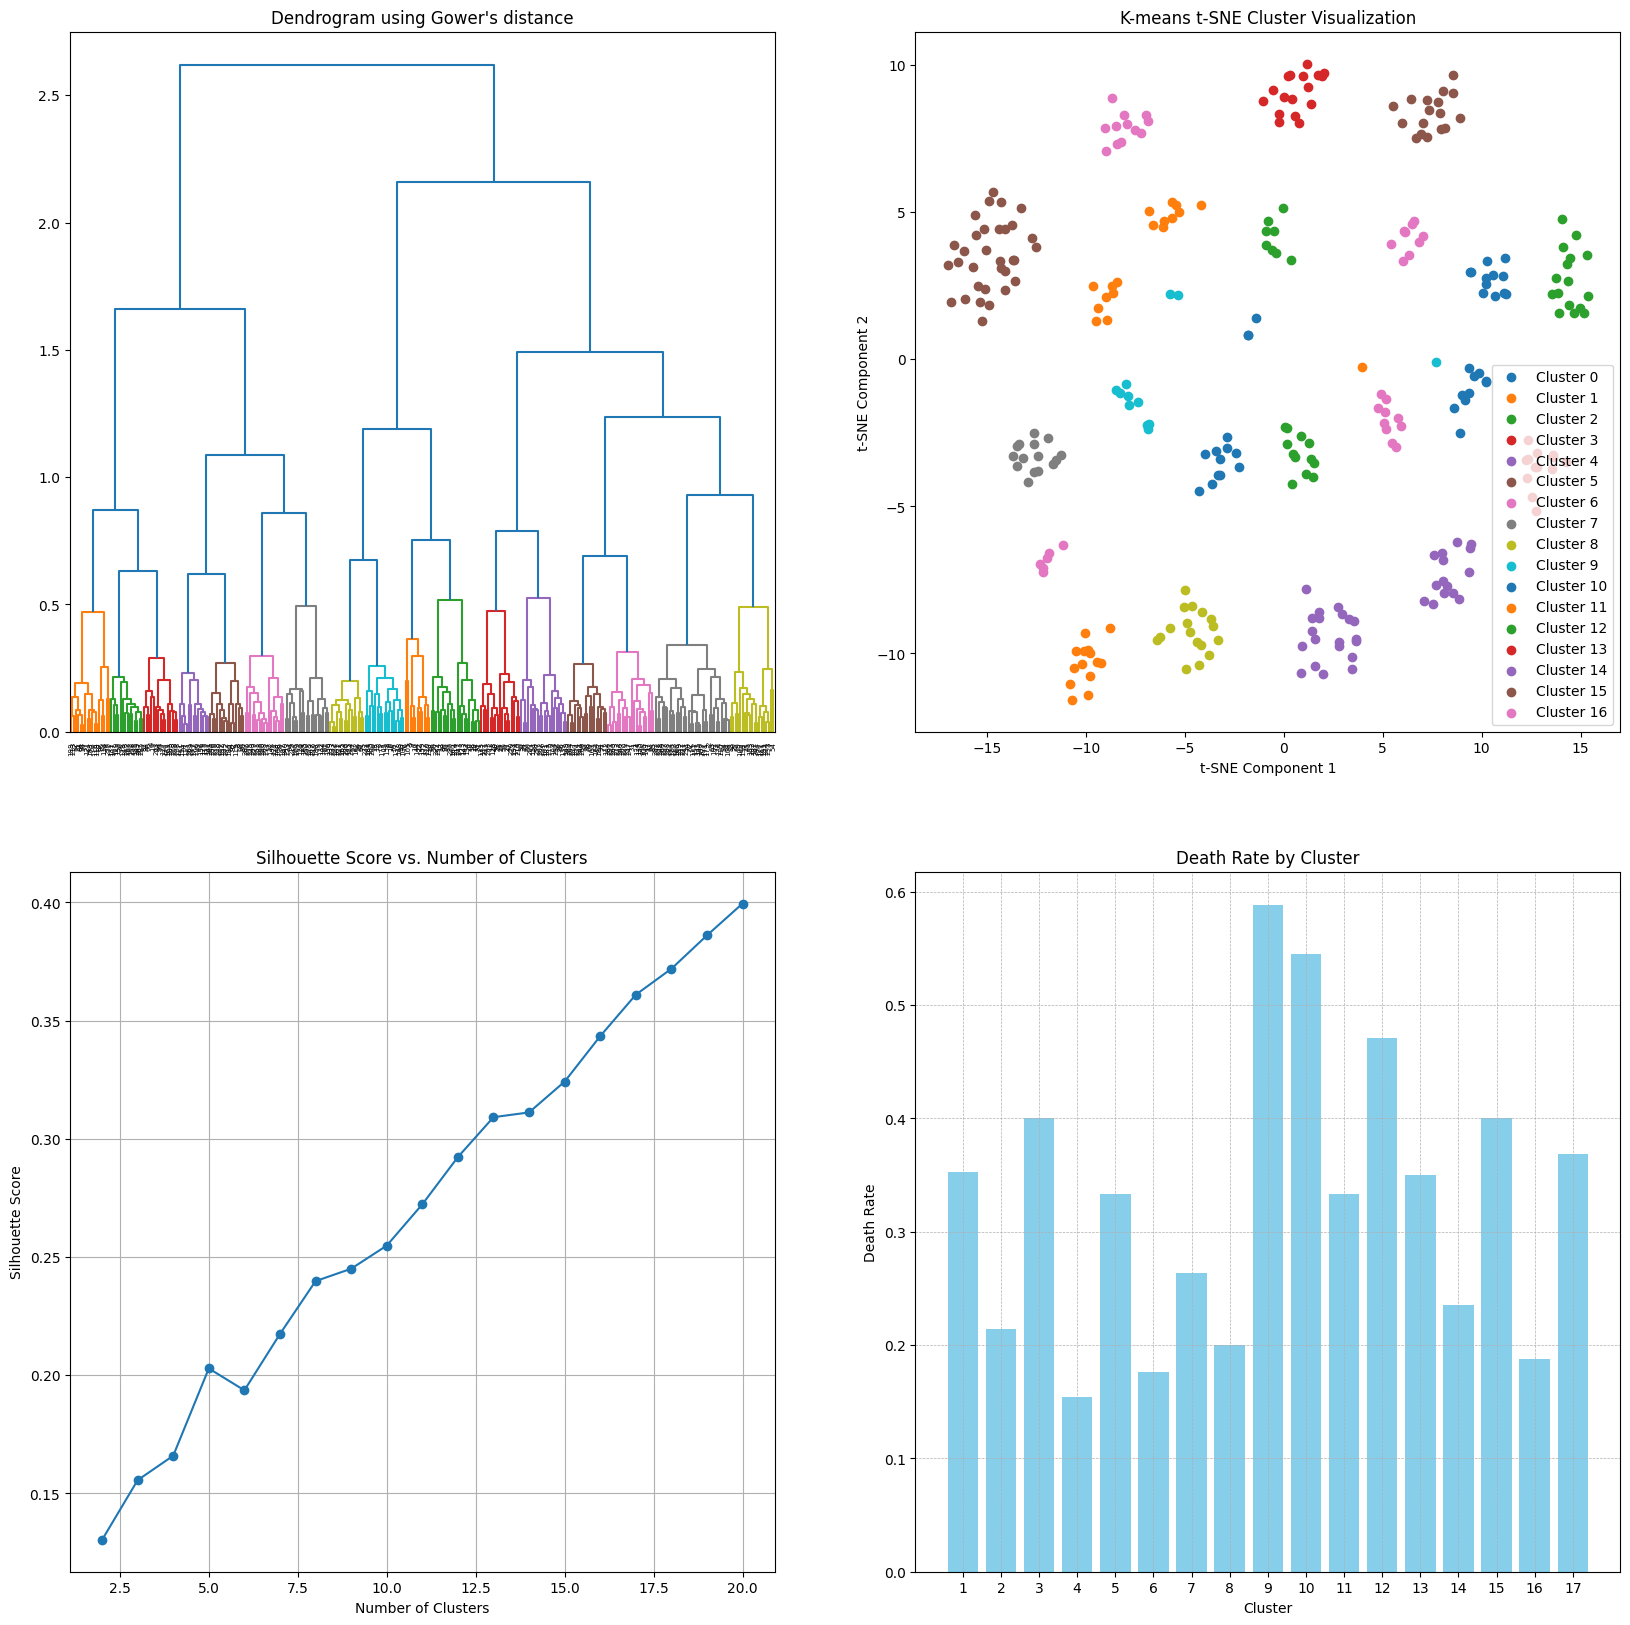

<Figure size 1000x800 with 0 Axes>

In [37]:
!pip install gower
import numpy as np
from sklearn.manifold import TSNE
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch
import gower
import itertools
from scipy.cluster.hierarchy import fcluster

df= pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Drop the 'DEATH_EVENT' column
# Split data into continuous and binary parts not including death_event column
continuous_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
binary_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
combined_cols = continuous_cols + binary_cols
df_combined = df[combined_cols].copy()

# Log-transform skewed variables creatinine phosphokinase and serum creatinine
df_combined['creatinine_phosphokinase'] = np.log1p(df_combined['creatinine_phosphokinase'])
df_combined['serum_creatinine'] = np.log1p(df_combined['serum_creatinine'])



# Standardize continuous data between 0 and 1 inclusive

scaler = MinMaxScaler()
df_combined[continuous_cols] = scaler.fit_transform(df_combined[continuous_cols])
# Ensure there are no missing values
assert df_combined.isnull().sum().sum() == 0, "There are still missing values in the dataframe."
# Compute Gower's distance matrix
gower_distance_matrix = gower.gower_matrix(df_combined)

# Convert the distance matrix to a condensed form
gower_distance_condensed = sch.distance.squareform(gower_distance_matrix, checks=False)

# Perform hierarchical clustering using the Ward method
linked = sch.linkage(gower_distance_condensed, method='ward')

# Cut the dendrogram based on the threshold
CUT_THRESHOLD = .6


fig,axs =plt.subplots(2,2, figsize=(20,20))
# Plot dendrogram in left top spot
sch.dendrogram(linked, color_threshold=CUT_THRESHOLD, ax=axs[0, 0])
axs[0, 0].set_title("Dendrogram using Gower's distance")

cluster_labels = fcluster(linked, t=CUT_THRESHOLD, criterion='distance')
print(cluster_labels)
# Extract initial centroids for k-means from the data without the 'Cluster' column

initial_centroids = []
for cluster in set(cluster_labels):
    initial_centroids.append(df_combined[cluster_labels == cluster].mean().values)
initial_centroids = np.array(initial_centroids)

# K-means clustering with initial centroids
n_clusters = len(initial_centroids)
kmeans = KMeans(n_clusters=n_clusters, init=initial_centroids, n_init=100, random_state=42)
kmeans_clusters = kmeans.fit_predict(df_combined)
# Update cluster_labels with kmeans_clusters for visualization
cluster_labels = kmeans_clusters

# t-SNE for visualization
tsne = TSNE(n_components=2, metric='precomputed', init='random', random_state=42)
tsne_results = tsne.fit_transform(gower_distance_matrix)

plt.figure(figsize=(10, 8))
for cluster_num in set(cluster_labels):
    subset = tsne_results[cluster_labels == cluster_num]
    axs[0,1].scatter(subset[:, 0], subset[:, 1], label=f'Cluster {cluster_num}')
axs[0,1].legend()
axs[0,1].set_title("K-means t-SNE Cluster Visualization")
axs[0,1].set_xlabel("t-SNE Component 1")
axs[0,1].set_ylabel("t-SNE Component 2")

# Group by cluster label and describe each group
df_combined['Cluster']=cluster_labels
cluster_descriptive_stats = df_combined.groupby('Cluster').describe()

# Silhouette Score
from sklearn.metrics import silhouette_score

# Drop the 'Cluster' column from df_combined to get the original data
df_without_clusters = df_combined.drop(columns=['Cluster'])

from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster

# Perform hierarchical clustering using the Ward method on the Gower's distance matrix
linked = sch.linkage(gower_distance_condensed, method='ward')

all_kmeans_clusters = {}  # Store cluster labels for each number of clusters
all_centroids = {}        # Store centroids for each number of clusters
all_scores = {}           # Store silhouette scores for each number of clusters (if desired)

# Loop through each desired cluster number
for n_clusters in range(2, 21):
    # Cut the dendrogram
    cluster_labels = fcluster(linked, t=n_clusters, criterion='maxclust')

    # Extract centroids
    initial_centroids = []
    for cluster in set(cluster_labels):
        initial_centroids.append(df_combined[cluster_labels == cluster].mean().values)
    initial_centroids = np.array(initial_centroids)

    # Apply KMeans clustering with initial centroids
    kmeans = KMeans(n_clusters=n_clusters, init=initial_centroids, n_init=1, random_state=42)
    kmeans_clusters = kmeans.fit_predict(df_combined)

    # Store results
    all_kmeans_clusters[n_clusters] = kmeans_clusters
    all_centroids[n_clusters] = kmeans.cluster_centers_

    # (Optional) Compute and store silhouette score
    score = silhouette_score(df_without_clusters, kmeans_clusters)
    all_scores[n_clusters] = score

# Now, you can access the KMeans clusters for any number of clusters with:
# all_kmeans_clusters[desired_number_of_clusters]

# 3. Silhouette scores vs. Number of Clusters
clusters_numbers = list(all_scores.keys())
silhouette_scores = list(all_scores.values())
axs[1, 0].plot(clusters_numbers, silhouette_scores, '-o')
axs[1, 0].set_xlabel('Number of Clusters')
axs[1, 0].set_ylabel('Silhouette Score')
axs[1, 0].set_title('Silhouette Score vs. Number of Clusters')
axs[1, 0].grid(True)

# 1. Add the 'Cluster' column to the original dataframe
cluster_labels2= fcluster(linked, t=CUT_THRESHOLD, criterion='distance')
df['Cluster'] = cluster_labels2

# 2. Group by 'Cluster' and compute death rate for each cluster
death_rates = df.groupby('Cluster')['DEATH_EVENT'].mean()

# 3. Visualize death rates
axs[1, 1].bar(death_rates.index, death_rates.values, color='skyblue')
axs[1, 1].set_title('Death Rate by Cluster')
axs[1, 1].set_xlabel('Cluster')
axs[1, 1].set_ylabel('Death Rate')
axs[1, 1].set_xticks(list(death_rates.index))
axs[1, 1].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()





#Cluster 9 consists of predominantly male, non-diabetic, anaemia, no high blood pressure, non-smokers.

In [97]:
# Extracting data for cluster number 10
cluster_9_data = df[df['Cluster'] == 9]

# Displaying the first few rows of cluster number 10 data
print("Cluster 9 data")
print(cluster_9_data)

Cluster 9 data
      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
3    50.0        1                       111         0                 20   
6    75.0        1                       246         0                 15   
12   45.0        1                       981         0                 30   
15   82.0        1                       379         0                 50   
16   87.0        1                       149         0                 38   
28   58.0        1                        60         0                 38   
55   95.0        1                       371         0                 30   
93   60.0        1                       154         0                 25   
100  65.0        1                       305         0                 25   
137  68.0        1                       646         0                 25   
148  75.0        1                       582         0                 30   
158  85.0        1                       910         0       

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
# Extracting data for cluster number 10
cluster_4_data = df[df['Cluster'] == 4]

# Displaying the first few rows of cluster number 10 data
print("Cluster 4 data")
print(cluster_4_data)

Cluster 4 data
      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
49   57.0        1                       129         0                 30   
97   70.0        1                        59         0                 60   
113  70.0        1                       143         0                 60   
115  58.0        1                       400         0                 40   
117  85.0        1                       102         0                 60   
125  43.0        1                       358         0                 50   
141  46.0        1                       291         0                 35   
156  52.0        1                        58         0                 35   
177  49.0        1                        69         0                 50   
191  64.0        1                        62         0                 60   
206  40.0        1                       101         0                 40   
261  62.0        1                       655         0       

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:792: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = leg.legendHandles
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:792: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = leg.legendHandles
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:792: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = leg.legendHandles
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:792: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 

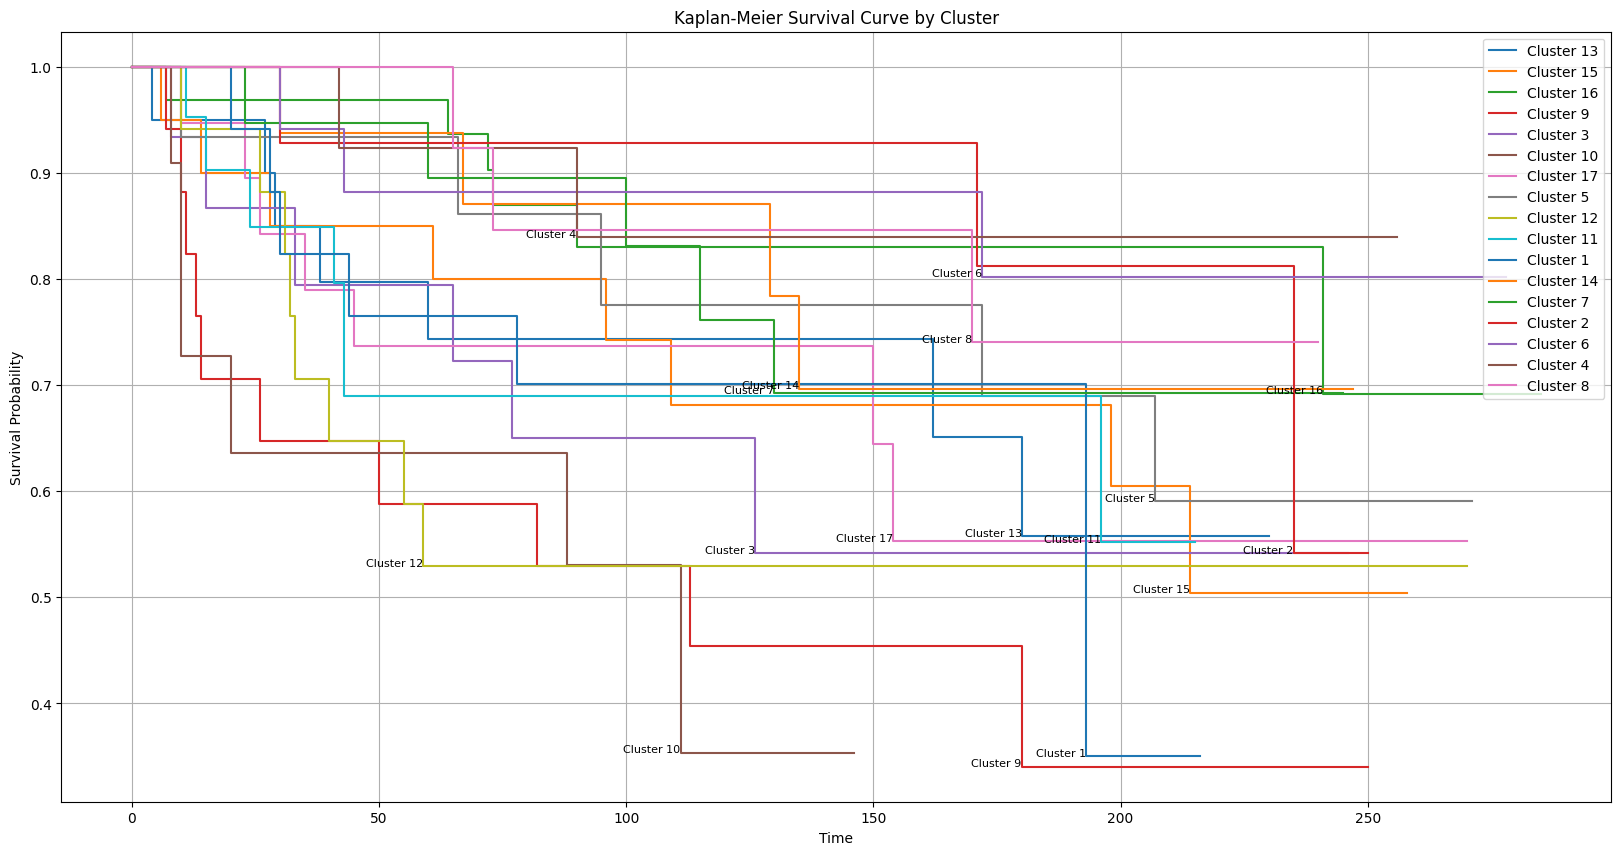

In [107]:
!pip install lifelines
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

kmf = KaplanMeierFitter()

plt.figure(figsize=(20, 10))


for cluster in df['Cluster'].unique():
    mask = df['Cluster'] == cluster
    kmf.fit(df[mask]['time'], event_observed=df[mask]['DEATH_EVENT'], label=f"Cluster {cluster}")
    kmf.plot_survival_function(ci_show=False)

    # Get the last event time of this cluster
    last_event_time = df[mask & (df['DEATH_EVENT'] == 1)]['time'].max()
    survival_probability = kmf.predict(last_event_time)

    # Annotate the curve with the cluster number at the last event time
    plt.annotate(f"Cluster {cluster}", (last_event_time, survival_probability), fontsize=8, ha='right')

plt.title("Kaplan-Meier Survival Curve by Cluster")
plt.ylabel("Survival Probability")
plt.xlabel("Time")
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(loc='upper right')

plt.grid(True)
plt.show()



#The Kaplan Meier Survival Curve does in fact help us show that the features associated with cluster 9 (as well as cluster no. 10) are at an extreme risk for mortality in comparison to the other clusters.

In [108]:
from lifelines import CoxPHFitter

# Assuming df is your DataFrame and 'time' and 'DEATH_EVENT' are your time and event columns
# and you've other columns as potential predictors

cph = CoxPHFitter()
cph.fit(df, duration_col='time', event_col='DEATH_EVENT')
cph.print_summary()  # View the coefficients and their significance levels


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<lifelines.CoxPHFitter: fitted with 299 total observations, 203 right-censored observations>
             duration col = 'time'
                event col = 'DEATH_EVENT'
      baseline estimation = breslow
   number of observations = 299
number of events observed = 96
   partial log-likelihood = -467.21
         time fit was run = 2023-11-01 09:36:58 UTC

---
                           coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                        
age                        0.05       1.05       0.01             0.03             0.06                 1.03                 1.07
anaemia                    0.64       1.91       0.25             0.16             1.13                 1.17                 3.10
creatinine_phosphokinase   0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
diabetes                   0.22       1.24       0.23            -0.23             0.67                 0.80                 1.95
ejection_fraction         -0.05       0.95       0.01            -0.07            -0.03                 0.93                 0.97
high_blood_pressure        0.47       1.59       0.22             0.04             0.89                 1.04                 2.44
platelets                 -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
serum_creatinine           0.32       1.38       0.07             0.18             0.46                 1.20                 1.58
serum_sodium              -0.05       0.95       0.02            -0.09            -0.00                 0.91                 1.00
sex                       -0.43       0.65       0.29            -0.99             0.13                 0.37                 1.13
smoking                   -0.01       0.99       0.27            -0.54             0.52                 0.59                 1.67
Cluster                    0.05       1.05       0.03            -0.02             0.11                 0.98                 1.12

                           cmp to     z      p   -log2(p)
covariate                                                
age                          0.00  4.90 <0.005      19.98
anaemia                      0.00  2.59   0.01       6.72
creatinine_phosphokinase     0.00  2.10   0.04       4.80
diabetes                     0.00  0.96   0.34       1.56
ejection_fraction            0.00 -4.78 <0.005      19.09
high_blood_pressure          0.00  2.13   0.03       4.93
platelets                    0.00 -0.18   0.85       0.23
serum_creatinine             0.00  4.54 <0.005      17.47
serum_sodium                 0.00 -2.05   0.04       4.65
sex                          0.00 -1.52   0.13       2.97
smoking                      0.00 -0.04   0.97       0.04
Cluster                      0.00  1.44   0.15       2.73
---
Concordance = 0.74
Partial AIC = 958.41
log-likelihood ratio test = 84.00 on 12 df
-log2(p) of ll-ratio test = 40.36

In [83]:
# List of categorical columns
binary_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']


for col in binary_cols:
    crosstab_result = pd.crosstab(df_combined['Cluster'], df_combined[col])
    print(f"\nCrosstab for {col}:")
    print(crosstab_result)

import pandas as pd

# Assuming your dataframe is named df, and has a 'Cluster' column and a 'death' column where death=1 means the patient died.
death_crosstab = pd.crosstab(df_combined['Cluster'], df['DEATH_EVENT'])
# Compute the death rate for each cluster
death_rate = death_crosstab[1] / (death_crosstab[0] + death_crosstab[1])
print(death_rate)




Crosstab for anaemia:
anaemia   0   1
Cluster        
0         0  51
1        51  13
2         0  63
3        38   2
4        81   0

Crosstab for diabetes:
diabetes   0   1
Cluster         
0          0  51
1         38  26
2         63   0
3         21  19
4         52  29

Crosstab for high_blood_pressure:
high_blood_pressure   0   1
Cluster                    
0                    36  15
1                    45  19
2                    32  31
3                     0  40
4                    81   0

Crosstab for sex:
sex       0   1
Cluster        
0        28  23
1        64   0
2        11  52
3         2  38
4         0  81

Crosstab for smoking:
smoking   0   1
Cluster        
0        44   7
1        64   0
2        38  25
3        20  20
4        37  44
Cluster
0    0.352941
1    0.234375
2    0.412698
3    0.375000
4    0.271605
dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cluster 0:
Represents group of paitents who are anaemic, diabetic, and mostly without high bloodpressure and mostly non-smokers.  
cluster 4:
represents patients who are not anemic, and have varying diabetes status, no high blood pressure, all of the same sex=1, and have a balanced smoker/non-smoker distribution.

Notes: exlusivity in certain clusters (likecluster 0 for anameia and diabetes, and cluster 4 for anaemia and high blood pressure) might hint at interaction effects between these features.



Now we will use Kernel K-means

11
Number of unique labels: 11


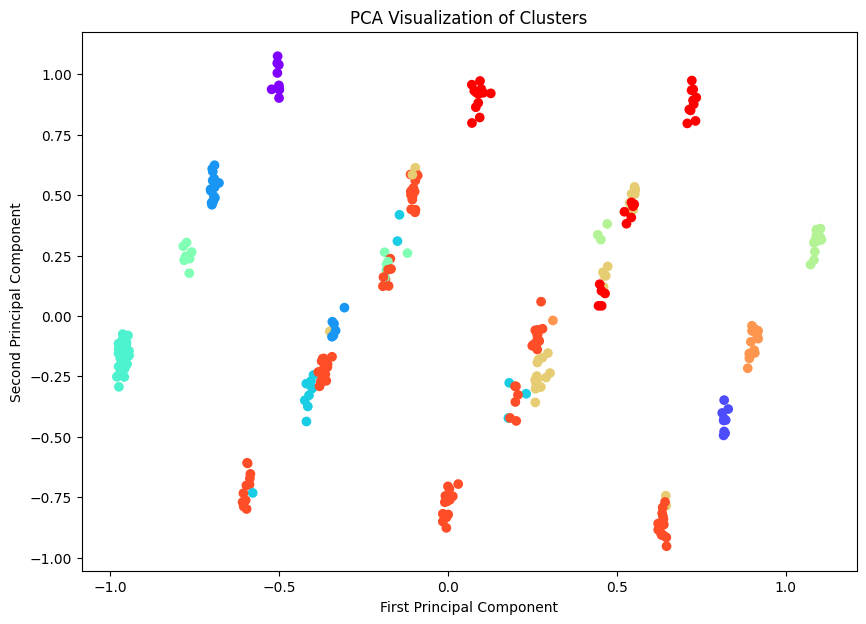

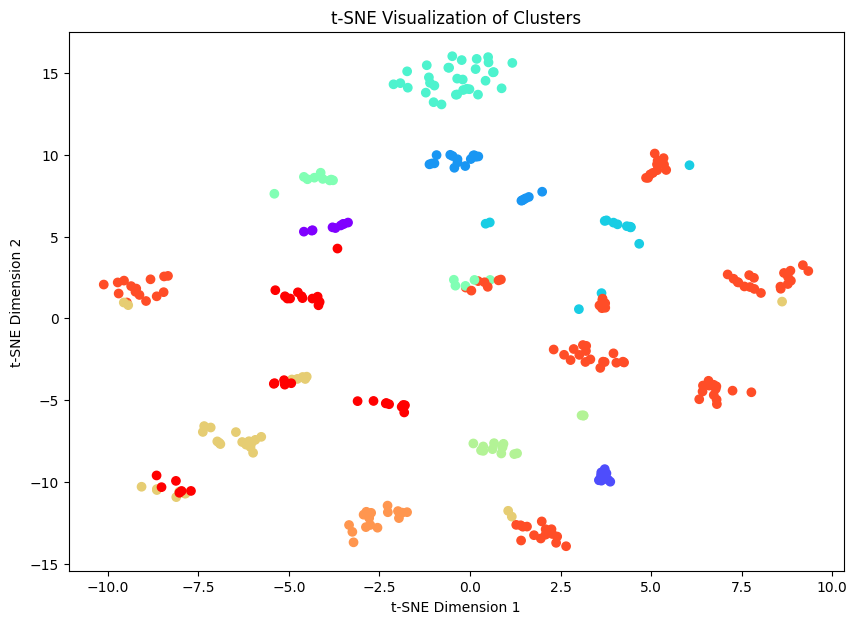

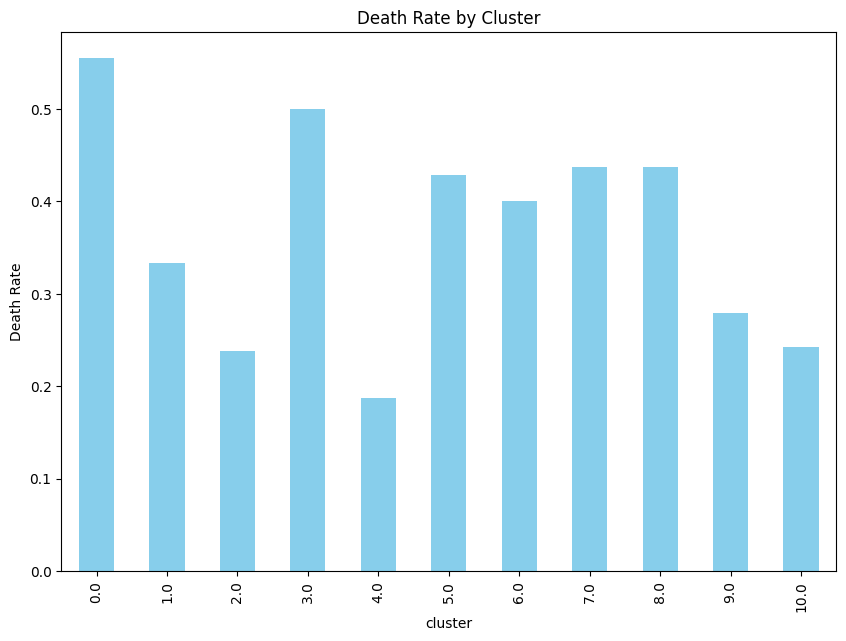

In [34]:
!pip install pyclustering
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from pyclustering.cluster.kmeans import kmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.utils.metric import type_metric, distance_metric
import itertools

df= pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Drop the 'DEATH_EVENT' column
# Split data into continuous and binary parts not including death_event column
continuous_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
binary_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
combined_cols = continuous_cols + binary_cols
df_combined = df[combined_cols].copy()

# Log-transform skewed variables creatinine phosphokinase and serum creatinine
df_combined['creatinine_phosphokinase'] = np.log1p(df_combined['creatinine_phosphokinase'])
df_combined['serum_creatinine'] = np.log1p(df_combined['serum_creatinine'])

# Standardize continuous data between 0 and 1 inclusive
scaler = MinMaxScaler()
df_combined[continuous_cols] = scaler.fit_transform(df_combined[continuous_cols])


#kernel k means


# Define an RBF kernel function
def rbf_kernel(point1, point2):
    gamma = 0.5
    return np.exp(-gamma * np.linalg.norm(np.array(point1) - np.array(point2))**2)

#We set up k-means algorithm to use rbf kernel as its distance metric.
metric = distance_metric(type_metric.USER_DEFINED, func=rbf_kernel)

# Use df_combined values for clustering
sample = df_combined.values.tolist()

# Initialize initial centers using K-Means++ method
n_clusters = 17
initial_centers = kmeans_plusplus_initializer(sample, n_clusters).initialize()

# Create K-Means instance with specific distance metric
kmeans_instance = kmeans(sample, initial_centers, metric=metric)

# Run clustering
kmeans_instance.process()
clusters = kmeans_instance.get_clusters()
print(len(clusters))
# Convert clusters to labels for visualization
labels = np.zeros(len(sample))
for cluster_idx, cluster in enumerate(clusters):
    for point_idx in cluster:
        labels[point_idx] = cluster_idx
sample = df_combined.values
unique_labels = np.unique(labels)


# PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(sample)
plt.figure(figsize=(10, 7))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='rainbow')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Visualization of Clusters')
plt.show()

# t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
df_tsne = tsne.fit_transform(sample)
plt.figure(figsize=(10, 7))
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=labels, cmap='rainbow')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Clusters')
plt.show()
# Adding the cluster labels to original dataframe
df['cluster'] = labels
cluster_death_rates = df.groupby('cluster')['DEATH_EVENT'].mean()


# Plotting death rates by cluster
cluster_death_rates.plot(kind='bar', figsize=(10,7), color='skyblue')
plt.ylabel('Death Rate')
plt.title('Death Rate by Cluster')
plt.show()



In [27]:
# Adding the cluster labels to the original dataframe
df_combined['cluster'] = labels

# Grouping by cluster and calculating the death rate for each one
cluster_death_rates = df.groupby('cluster')['DEATH_EVENT'].mean()

print(cluster_death_rates)

cluster
0.0     0.466667
1.0     0.352941
2.0     0.500000
3.0     0.323529
4.0     0.333333
5.0     0.388889
6.0     0.333333
7.0     0.269231
8.0     0.244444
9.0     0.333333
10.0    0.333333
11.0    0.153846
Name: DEATH_EVENT, dtype: float64


The nature of Kernel k-means clustering is what is reducing the number of clusters from 17 to 11. This is not an inherently good trait given that we are looking for very explicit and specific types of clusters, as you would expect with examining medical data, which requires precision.

# EM

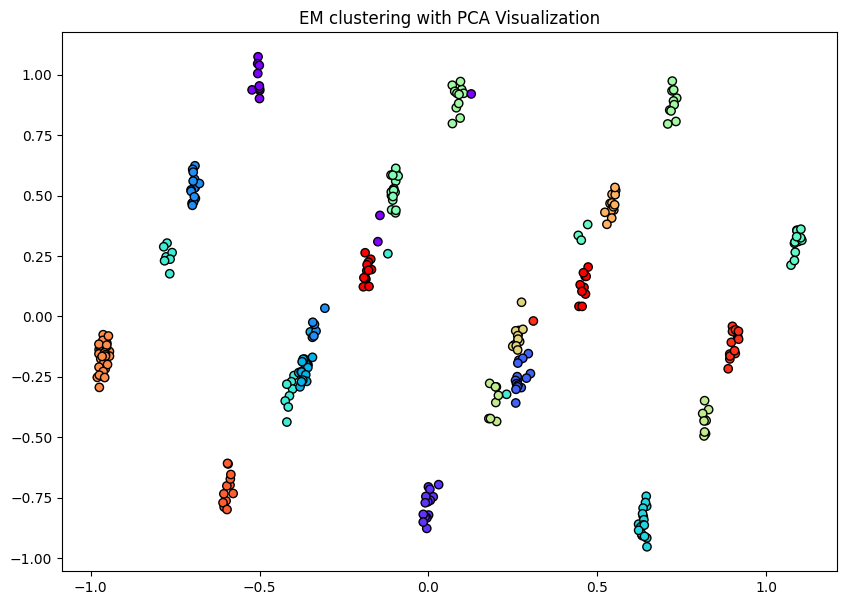

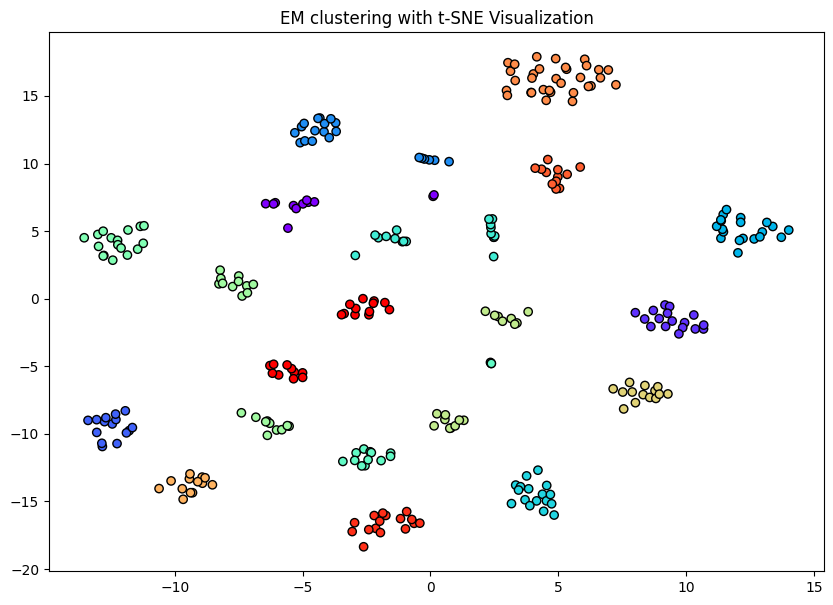

In [35]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

df= pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Drop the 'DEATH_EVENT' column
# Split data into continuous and binary parts not including death_event column
continuous_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
binary_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
combined_cols = continuous_cols + binary_cols
df_combined = df[combined_cols].copy()

# Log-transform skewed variables creatinine phosphokinase and serum creatinine
df_combined['creatinine_phosphokinase'] = np.log1p(df_combined['creatinine_phosphokinase'])
df_combined['serum_creatinine'] = np.log1p(df_combined['serum_creatinine'])

# Standardize continuous data between 0 and 1 inclusive
scaler = MinMaxScaler()
df_combined[continuous_cols] = scaler.fit_transform(df_combined[continuous_cols])

# Apply EM with GMM, set cluster no =17
gmm = GaussianMixture(n_components=17, n_init=10)
gmm.fit(df_combined)
labels = gmm.predict(df_combined)
probs = gmm.predict_proba(df_combined)

# Use PCA for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_combined)

# Plot
plt.figure(figsize=(10,7))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='rainbow', edgecolor='k')
plt.title('EM clustering with PCA Visualization')
plt.show()

# Apply t-SNE to the data
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(df_combined)

# Plot
plt.figure(figsize=(10,7))
plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=labels, cmap='rainbow', edgecolor='k')
plt.title('EM clustering with t-SNE Visualization')
plt.show()




In [36]:
# Adding the cluster labels to the original dataframe
df['cluster'] = labels

# Grouping by cluster and calculating the death rate for each one
cluster_death_rates = df.groupby('cluster')['DEATH_EVENT'].mean()

print(cluster_death_rates)

cluster
0     0.500000
1     0.235294
2     0.333333
3     0.238095
4     0.400000
5     0.176471
6     0.444444
7     0.400000
8     0.588235
9     0.333333
10    0.352941
11    0.214286
12    0.153846
13    0.187500
14    0.333333
15    0.437500
16    0.272727
Name: DEATH_EVENT, dtype: float64


#1.5. COMPARE AND CONTRAST ALL THREE METHODS:



#1.6. Analyze the clinical significance of patient clusters in predicting 'DEATH_EVENT.'



Upon analyzing the data and examining clusters ranging from 1 to 20 using the K-means algorithm (with the Gower's distance metric), I observed significant variability in death rates. Notably, this variability was most pronounced when the cluster number was approximately 17. For the K-means clustering, centroids were initialized from the centroids derived from hierarchical clustering. Notice that the nature of Kernel k-means clustering is what is reducing the number of clusters from 17 to 11, which is not an inherently good trait given that we are looking for very explicit and specific types of clusters, as you would expect with examining medical data, which requires precision. That is, if you were examining results from a clinical trial, most likely a small cluster of patients are the few in the clinical trial that are having adverse effects from the placebo arm and not the treatment arm. So in my case, I am looking for specific clusters, which is why I set the number of clusters to a high value, which was also unavoiable given the nature of the dendrogram as shown above. If we run a frequent pattern growth algorithm on the data set we will see similaries with some of the clusters associated with a high death rate.

For example, in cluster #4 derived from K-means using gowers distance (these patients have the lowest rate), are individuals where sex=0, they are anemic, and nonsmoekrs, which algins with some of hte frequent itemsets and associations found in the entire dataset from the fp algorithm.

Cluste #9 consists of patients wth low blood pressure, anaemic, non-diabetic, non-smokers, with the highest proportion of deaths compared to all of hte other clusters (aproximately 59% of the patients in this cluster have suffered from a death event). Here all individuals in this cluster have anemia, none have diabetes, the vast majority are male and non are smakers. The Kaplan Meier curve also confirms that this group has the highest mortality rate as well. It is worth further examining patterns from cluster #9 with experts like cardiologists to get more perspective on these patterns.  

sex       0   1
Cluster        
0        24  43
1        19  38
2         7  16
3        34  50
4        21  47


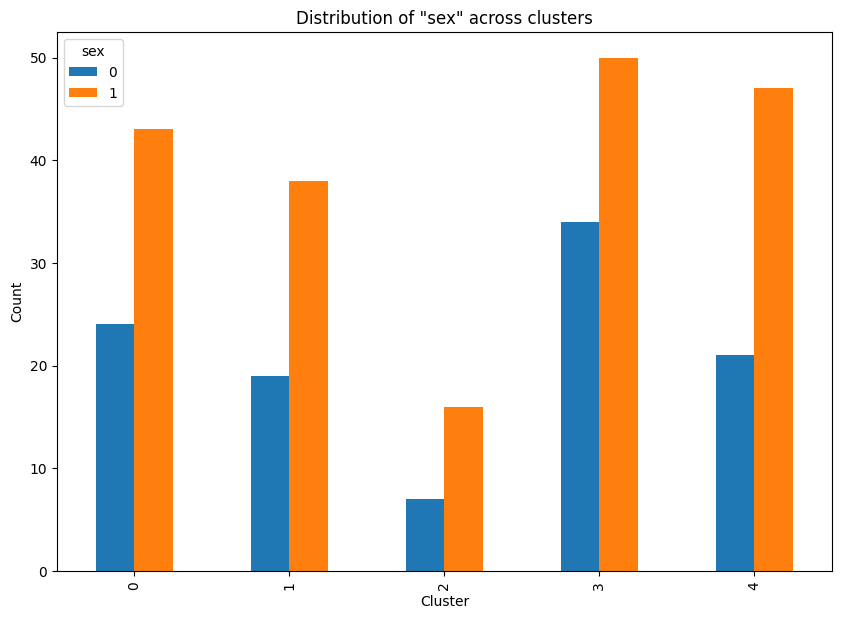

In [ ]:
crosstab_result = pd.crosstab(df_combined['Cluster'], df_combined['sex'])
print(crosstab_result)
crosstab_result.plot(kind="bar", figsize=(10,7))
plt.title('Distribution of "sex" across clusters')
plt.ylabel('Count')
plt.xlabel('Cluster')
plt.show()


#Associations

In [78]:
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

df= pd.read_csv('heart_failure_clinical_records_dataset.csv')
continuous_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
binary_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
combined_cols = continuous_cols + binary_cols
df_combined = df[combined_cols].copy()

binary_data = df[binary_cols]
frequent_itemsets = fpgrowth(binary_data, min_support=0.05, use_colnames=True)

print(frequent_itemsets)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
print(rules)


     support                                      itemsets
0   0.648829                                         (sex)
1   0.351171                         (high_blood_pressure)
2   0.321070                                 (DEATH_EVENT)
3   0.321070                                     (smoking)
4   0.431438                                     (anaemia)
5   0.418060                                    (diabetes)
6   0.204013                    (high_blood_pressure, sex)
7   0.160535                (high_blood_pressure, anaemia)
8   0.143813               (high_blood_pressure, diabetes)
9   0.083612           (high_blood_pressure, sex, anaemia)
10  0.056856      (high_blood_pressure, diabetes, anaemia)
11  0.070234          (high_blood_pressure, diabetes, sex)
12  0.207358                            (DEATH_EVENT, sex)
13  0.130435            (high_blood_pressure, DEATH_EVENT)
14  0.153846                        (DEATH_EVENT, anaemia)
15  0.133779                       (DEATH_EVENT, diabete

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:


# Add the cluster assignments to the dataframe
df_combined['Cluster'] = clusters_k

# Generate crosstabs for each categorical variable
crosstabs = {}
for col in binary_cols:
    crosstabs[col] = pd.crosstab(df_combined['Cluster'], df_combined[col], margins=True, margins_name="Total")

# Display the crosstabs
for col, crosstab in crosstabs.items():
    print(f"\nCrosstab for {col}:\n", crosstab)




Crosstab for anaemia:
 anaemia    0    1  Total
Cluster                 
0         43   11     54
1         19   60     79
2          3    7     10
3         60   20     80
4          6    0      6
5         39   31     70
Total    170  129    299

Crosstab for diabetes:
 diabetes    0    1  Total
Cluster                  
0          13   41     54
1          32   47     79
2           7    3     10
3          51   29     80
4           5    1      6
5          66    4     70
Total     174  125    299

Crosstab for high_blood_pressure:
 high_blood_pressure    0    1  Total
Cluster                             
0                     33   21     54
1                     25   54     79
2                      6    4     10
3                     59   21     80
4                      5    1      6
5                     66    4     70
Total                194  105    299

Crosstab for sex:
 sex        0    1  Total
Cluster                 
0         21   33     54
1         51   28     79
2  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#2.1a. Determine appropriate variables to be used for multiple linear regression, considering the findings from above, we should look for interactions as well.

In [115]:
binary_columns = [col for col in df.columns if df[col].nunique() == 2 and col != 'DEATH_EVENT']
binary_interactions = list(itertools.combinations(binary_columns, 2))
for interaction in binary_interactions:
    col_name = f"{interaction[0]}_x_{interaction[1]}"
    df[col_name] = df[interaction[0]] * df[interaction[1]]
X_interactions = df[[f"{pair[0]}_x_{pair[1]}" for pair in binary_interactions]]
X_interactions = sm.add_constant(X_interactions)

model = sm.OLS(y, X_interactions)
fit = model.fit()

print(fit.summary())


                            OLS Regression Results                            
Dep. Variable:            DEATH_EVENT   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.129
Date:                Wed, 01 Nov 2023   Prob (F-statistic):              0.340
Time:                        10:13:47   Log-Likelihood:                -190.77
No. Observations:                 299   AIC:                             403.5
Df Residuals:                     288   BIC:                             444.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
import pandas as pd
import itertools
import statsmodels.api as sm

df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
y = df['DEATH_EVENT']
#df and y are defined above
binary_columns = [col for col in df.columns if df[col].nunique() == 2 and col != 'DEATH_EVENT']
binary_interactions = list(itertools.combinations(binary_columns, 2))

# Create interaction columns and concatenate them all at once to avoid fragmentation
interaction_data = {}
for interaction in binary_interactions:
    col_name = f"{interaction[0]}_x_{interaction[1]}"
    interaction_data[col_name] = df[interaction[0]] * df[interaction[1]]

df_interactions = pd.DataFrame(interaction_data)
df = pd.concat([df, df_interactions], axis=1)

X_interactions = df[[f"{pair[0]}_x_{pair[1]}" for pair in binary_interactions]]
X_interactions = sm.add_constant(X_interactions)  # Add constant term

# Fit the model
model = sm.OLS(y, X_interactions)
fit = model.fit()

# Print summary
print(fit.summary())

#coefficients sorted by t-values
coefficients = fit.summary2().tables[1]
coefficients_sorted = coefficients.sort_values(by='t', ascending=False)
print(coefficients_sorted)


                            OLS Regression Results                            
Dep. Variable:            DEATH_EVENT   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.7217
Date:                Wed, 01 Nov 2023   Prob (F-statistic):              0.540
Time:                        10:32:05   Log-Likelihood:                -195.43
No. Observations:                 299   AIC:                             398.9
Df Residuals:                     295   BIC:                             413.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [10]:
import pandas as pd
import itertools
import statsmodels.api as sm

df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
y = df['DEATH_EVENT']
binary_columns = [col for col in df.columns if df[col].nunique() == 2 and col != 'DEATH_EVENT']

# Store t-values and corresponding interaction names
t_values = {}

# Check for individual columns
for col in binary_columns:
    X = sm.add_constant(df[col])
    model = sm.OLS(y, X).fit()
    t_values[col] = model.tvalues[col]

# Check for pairs interactions
binary_pairs = list(itertools.combinations(binary_columns, 2))
for pair in binary_pairs:
    col_name = f"{pair[0]}_plus_{pair[1]}"
    df[col_name] = df[pair[0]] + df[pair[1]]
    X = sm.add_constant(df[col_name])
    model = sm.OLS(y, X).fit()
    t_values[col_name] = model.tvalues[col_name]

# Check for triple interaction
binary_triples = list(itertools.combinations(binary_columns, 3))
for triple in binary_triples:
    col_name = f"{triple[0]}_plus_{triple[1]}_plus_{triple[2]}"
    df[col_name] = df[triple[0]] + df[triple[1]] + df[triple[2]]
    X = sm.add_constant(df[col_name])
    model = sm.OLS(y, X).fit()
    t_values[col_name] = model.tvalues[col_name]

# Sorting by absolute t-values to get top 20 results
top_20 = sorted(t_values.items(), key=lambda x: abs(x[1]), reverse=True)[:20]

# Display top 20 results
for name, t_value in top_20:
    print(f"{name}: {t_value}")


anaemia_plus_high_blood_pressure: 1.7473635174747881
anaemia_plus_high_blood_pressure_plus_sex: 1.5000374617500698
anaemia_plus_diabetes_plus_high_blood_pressure: 1.4189983486770337
anaemia_plus_high_blood_pressure_plus_smoking: 1.4064871639571526
high_blood_pressure: 1.3718371343161462
anaemia: 1.144594334499387
high_blood_pressure_plus_sex: 0.9678411009824789
diabetes_plus_high_blood_pressure: 0.9342677054729723
high_blood_pressure_plus_smoking: 0.8505323764124555
anaemia_plus_sex: 0.81091343451739
diabetes_plus_high_blood_pressure_plus_sex: 0.795817997519732
anaemia_plus_diabetes: 0.7914878475628594
anaemia_plus_smoking: 0.7221820509803979
diabetes_plus_high_blood_pressure_plus_smoking: 0.6963611794883966
anaemia_plus_diabetes_plus_sex: 0.668539732657179
anaemia_plus_diabetes_plus_smoking: 0.5865292983244127
high_blood_pressure_plus_sex_plus_smoking: 0.5769055177411504
anaemia_plus_sex_plus_smoking: 0.48071013178613364
smoking: -0.2175608088008018
diabetes_plus_smoking: -0.188256924

In [11]:
import pandas as pd
import itertools
import statsmodels.api as sm

df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
y = df['DEATH_EVENT']

binary_columns = [col for col in df.columns if df[col].nunique() == 2 and col != 'DEATH_EVENT']
continuous_columns = [col for col in df.columns if col not in binary_columns and col != 'DEATH_EVENT']

# Create interaction terms
for bin_col in binary_columns:
    for cont_col in continuous_columns:
        interaction_col_name = f"{bin_col}_x_{cont_col}"
        df[interaction_col_name] = df[bin_col] * df[cont_col]

# Model testing: Let's take an example with all the interaction terms
X = df[[f"{bin_col}_x_{cont_col}" for bin_col in binary_columns for cont_col in continuous_columns]]
X = sm.add_constant(X)  # Add constant term

model = sm.OLS(y, X)
fit = model.fit()

# Print summary
print(fit.summary())

# If you want to display coefficients sorted by t-values
coefficients = fit.summary2().tables[1]
coefficients_sorted = coefficients.sort_values(by='t', ascending=False)
print(coefficients_sorted)


                            OLS Regression Results                            
Dep. Variable:            DEATH_EVENT   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     5.091
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           3.41e-15
Time:                        10:43:36   Log-Likelihood:                -119.18
No. Observations:                 299   AIC:                             310.4
Df Residuals:                     263   BIC:                             443.6
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

#determine which single regression parameters should be included

In [13]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
y = df['DEATH_EVENT']

results = []

# Loop through each column (excluding the target 'DEATH_EVENT')
for col in df.columns:
    if col != 'DEATH_EVENT':
        X = sm.add_constant(df[col])  # Add a constant term to the predictor
        model = sm.OLS(y, X)
        fit = model.fit()
        # Extract the t-value for the predictor (the second coefficient)
        t_value = fit.tvalues[1]
        results.append((col, t_value))

# Sort the results based on absolute t-values in descending order
results_sorted = sorted(results, key=lambda x: abs(x[1]), reverse=True)

# Display the top results
print("Predictor".ljust(30), "T-Value")
print("-" * 40)
for res in results_sorted:
    print(res[0].ljust(30), f"{res[1]:.5f}")

# Note: We're showing the absolute t-values for easier comparison, but the sign of the t-value is important in practice.


Predictor                      T-Value
----------------------------------------
time                           -10.68556
serum_creatinine               5.30646
ejection_fraction              -4.80563
age                            4.52061
serum_sodium                   -3.43006
high_blood_pressure            1.37184
anaemia                        1.14459
creatinine_phosphokinase       1.08317
platelets                      -0.84787
smoking                        -0.21756
sex                            -0.07439
diabetes                       -0.03348


2.1. Split the dataset into training and testing sets.

In [12]:
import pandas as pd
import itertools
import statsmodels.api as sm

df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
y = df['DEATH_EVENT']

binary_columns = [col for col in df.columns if df[col].nunique() == 2 and col != 'DEATH_EVENT']
continuous_columns = [col for col in df.columns if col not in binary_columns and col != 'DEATH_EVENT']

# Create triple interaction terms
for bin_pair in itertools.combinations(binary_columns, 2):
    for cont_col in continuous_columns:
        interaction_col_name = f"{bin_pair[0]}_x_{bin_pair[1]}_x_{cont_col}"
        df[interaction_col_name] = df[bin_pair[0]] * df[bin_pair[1]] * df[cont_col]

# Model testing with the interaction terms
X = df[[f"{bin_pair[0]}_x_{bin_pair[1]}_x_{cont_col}" for bin_pair in itertools.combinations(binary_columns, 2) for cont_col in continuous_columns]]
X = sm.add_constant(X)  # Add constant term

model = sm.OLS(y, X)
fit = model.fit()

# Display top 20 coefficients sorted by t-values
coefficients = fit.summary2().tables[1]
coefficients_sorted = coefficients.sort_values(by='t', ascending=False).head(10)
print(coefficients_sorted)


                                                       Coef.  Std.Err.  \
const                                               0.311355  0.040356   
diabetes_x_high_blood_pressure_x_serum_creatinine   0.595332  0.247307   
sex_x_smoking_x_age                                 0.012385  0.005803   
anaemia_x_high_blood_pressure_x_serum_creatinine    0.125300  0.062229   
anaemia_x_sex_x_age                                 0.010170  0.006427   
high_blood_pressure_x_smoking_x_creatinine_phos...  0.000628  0.000402   
diabetes_x_sex_x_age                                0.010692  0.007574   
anaemia_x_high_blood_pressure_x_platelets           0.000001  0.000001   
high_blood_pressure_x_sex_x_serum_sodium            0.005678  0.004906   
diabetes_x_high_blood_pressure_x_ejection_fraction  0.012786  0.011070   
anaemia_x_smoking_x_platelets                       0.000002  0.000002   
anaemia_x_diabetes_x_serum_sodium                   0.004643  0.004770   
sex_x_smoking_x_serum_creatinine      

#Based on the above findings, I found that the following variables to be the most significant:
high_blood_pressure*serum_creatinine           
diabetes*serum_creatinine                     
diabetes*high_blood_pressure*serum_creatinine  
serum_creatinine              
ejection_fraction             
age                            
Next we will test these variables again and see if the model wouldn't really benefit much from including one of these features or interactions. That is, I want to know which one of the above features I can drop from the model.

In [1]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
y = df['DEATH_EVENT']

# Define the interaction terms
df['high_blood_pressure*serum_creatinine'] = df['high_blood_pressure'] * df['serum_creatinine']
df['diabetes*serum_creatinine'] = df['diabetes'] * df['serum_creatinine']
df['diabetes*high_blood_pressure*serum_creatinine'] = df['diabetes'] * df['high_blood_pressure'] * df['serum_creatinine']

# Select the columns you've listed
selected_columns = [
    'high_blood_pressure*serum_creatinine',
    'diabetes*serum_creatinine',
    'diabetes*high_blood_pressure*serum_creatinine',
    'serum_creatinine',
    'ejection_fraction',
    'time',
    'age'
]

X = df[selected_columns]
X = sm.add_constant(X)  # Add constant term



# Fit the regression model
model = sm.OLS(y, X)
fit = model.fit()

# Print the summary
print(fit.summary())

# If you want to see coefficients sorted by t-values
coefficients = fit.summary2().tables[1]
coefficients_sorted = coefficients.sort_values(by='t', ascending=False)
print(coefficients_sorted)


                            OLS Regression Results                            
Dep. Variable:            DEATH_EVENT   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     28.48
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           9.14e-30
Time:                        16:37:31   Log-Likelihood:                -118.52
No. Observations:                 299   AIC:                             253.0
Df Residuals:                     291   BIC:                             282.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [2]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Outcome variable
y = df['DEATH_EVENT']

# Create interaction term
df['diabetes*high_blood_pressure*serum_creatinine'] = df['diabetes'] * df['high_blood_pressure'] * df['serum_creatinine']

# Independent variables
X = df[['serum_creatinine', 'age', 'ejection_fraction', 'time', 'diabetes', 'high_blood_pressure', 'diabetes*high_blood_pressure*serum_creatinine']]
X = sm.add_constant(X)  # Add constant term

# Fit the model
model = sm.OLS(y, X)
fit = model.fit()

# Display the results
print(fit.summary())


                            OLS Regression Results                            
Dep. Variable:            DEATH_EVENT   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     28.88
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           4.05e-30
Time:                        16:47:11   Log-Likelihood:                -117.66
No. Observations:                 299   AIC:                             251.3
Df Residuals:                     291   BIC:                             280.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------


#Here is the reduced multiple linear regression we will test:

Y= 0.6126 + 0.0942*serum_creatinine + 0.0053*age + (-0.0097)*ejection_fraction + (-0.0028)*time + (-0.0152)*diabetes + (-0.0732)*high_blood_pressure + 0.1260*interaction,

where interaction=diabetes* high_blood_pressure * serum_creatinine


#we should test our model for linearity(use residual vs. fitted plot), independence (that is are error terms independent),multicolinearity (correlation between variables in model- use VIF test), constant variance, normality of errors (Q-Q plot)....

#As we will see below, linearity is clearly violated, suggesting that we should use a nonlinear model.

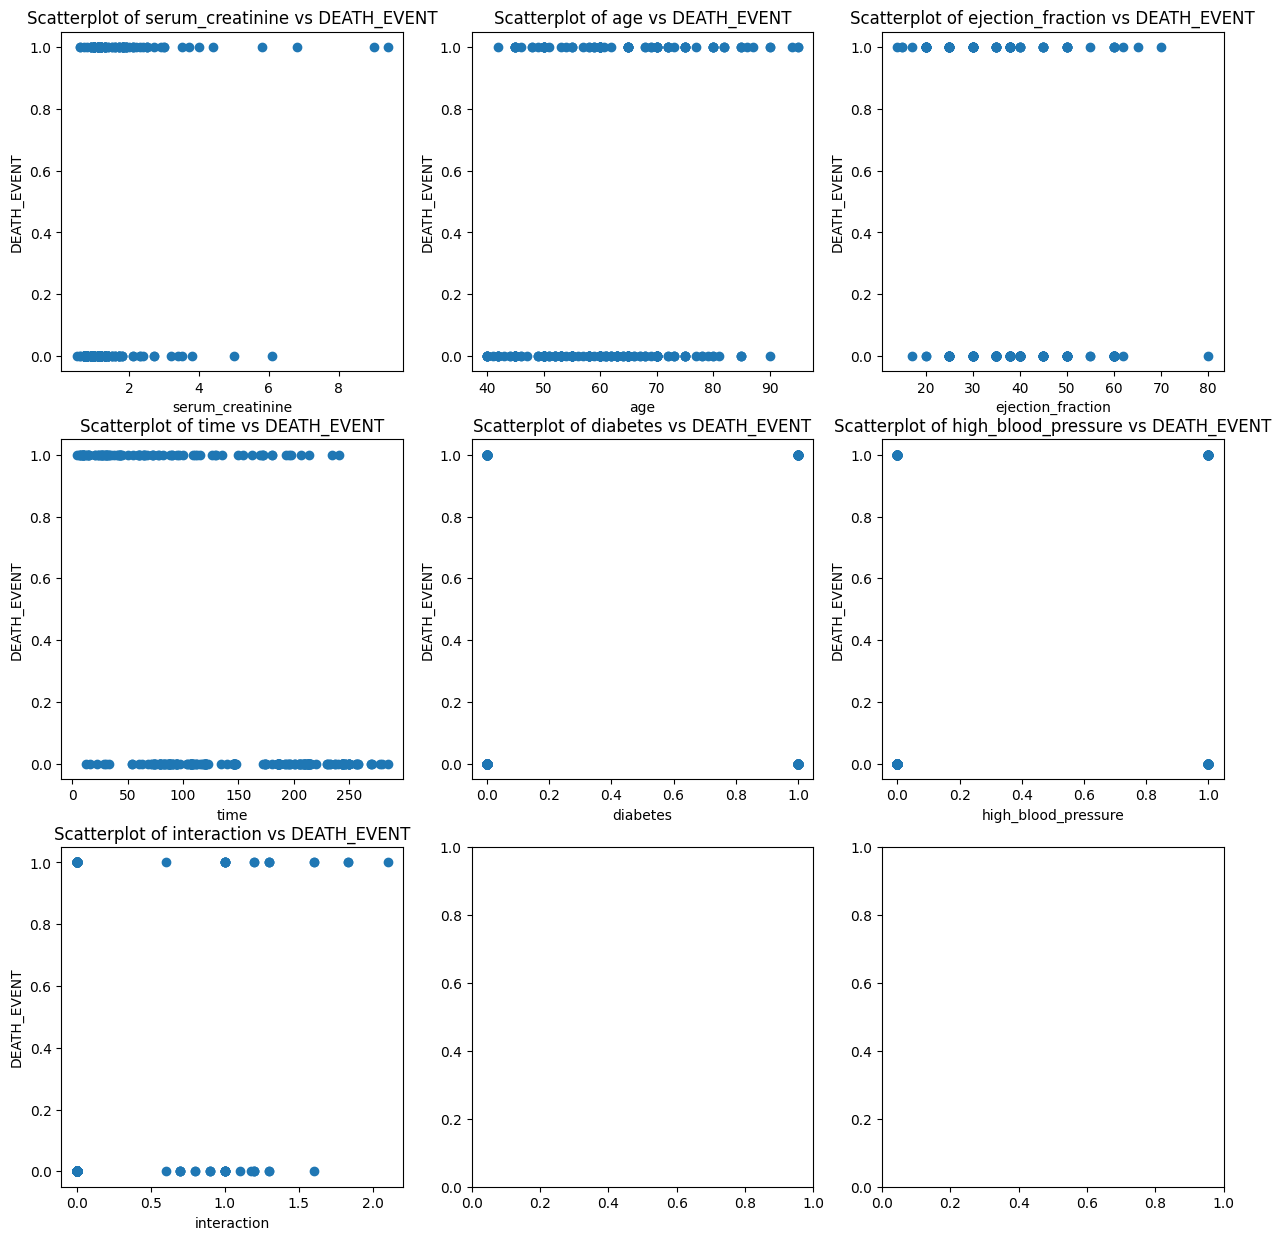

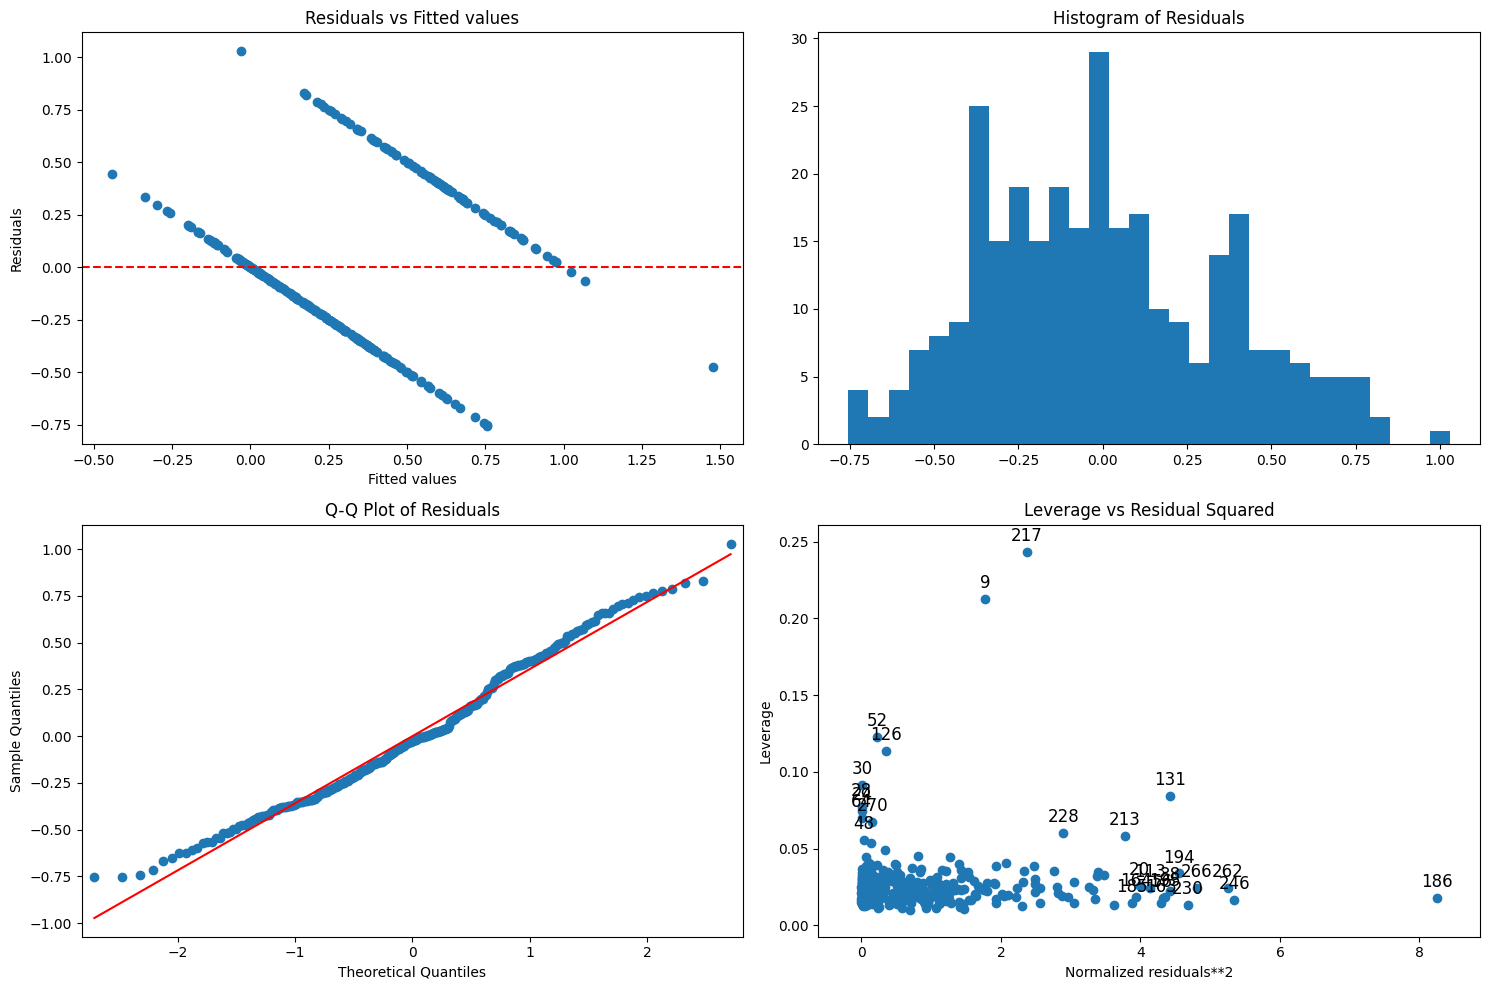

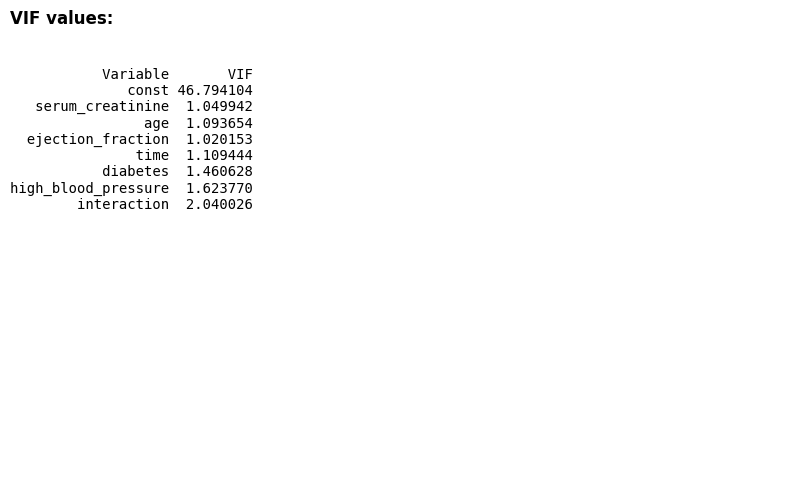

In [19]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import plot_leverage_resid2

# Variables to consider for scatterplots
variables = ["serum_creatinine", "age", "ejection_fraction", "time", "diabetes", "high_blood_pressure", "interaction"]


df["interaction"] = df["diabetes"] * df["high_blood_pressure"] * df["serum_creatinine"]

# Scatterplots for Linearity check
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Scatter plots for variables vs DEATH_EVENT
for i, var in enumerate(variables):
    row = i // 3
    col = i % 3
    axs[row, col].scatter(df[var], df['DEATH_EVENT'])
    axs[row, col].set_title(f'Scatterplot of {var} vs DEATH_EVENT')
    axs[row, col].set_xlabel(var)
    axs[row, col].set_ylabel('DEATH_EVENT')

# Prepare data for regression
X = df[variables]
X = sm.add_constant(X)

model = sm.OLS(df['DEATH_EVENT'], X).fit()
predictions = model.predict(X)
residuals = df['DEATH_EVENT'] - predictions

# Additional diagnostic plots in a new figure
fig2, axs2 = plt.subplots(2, 2, figsize=(15, 10))

# Residuals vs Fitted values for Homoscedasticity
axs2[0, 0].scatter(predictions, residuals)
axs2[0, 0].axhline(0, color='red', linestyle='--')
axs2[0, 0].set_title('Residuals vs Fitted values')
axs2[0, 0].set_xlabel('Fitted values')
axs2[0, 0].set_ylabel('Residuals')

# Histogram for Normality
axs2[0, 1].hist(residuals, bins=30)
axs2[0, 1].set_title('Histogram of Residuals')

# Q-Q Plot for Normality
sm.qqplot(residuals, line='s', ax=axs2[1, 0])
axs2[1, 0].set_title('Q-Q Plot of Residuals')

# Leverage vs Residual squared for Outliers
sm.graphics.plot_leverage_resid2(model, ax=axs2[1, 1])
axs2[1, 1].set_title('Leverage vs Residual Squared')

plt.tight_layout()
plt.show()

# Separate plot for VIFs
fig3, ax3 = plt.subplots(figsize=(10, 6))
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data = pd.DataFrame({'Variable': X.columns, 'VIF': vif})
text_content = vif_data.to_string(index=False)
ax3.axis('off')
ax3.text(0, 1, "VIF values:", weight='bold', fontsize=12)
ax3.text(0, 0.6, text_content, fontsize=10, family='monospace')
plt.show()



2.2. Perform Linear Regression using relevant clinical features to predict 'DEATH_EVENT.'

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming your data is in a DataFrame called df
X = df[["serum_creatinine", "age", "ejection_fraction", "time", "diabetes", "high_blood_pressure"]].copy()
X["interaction"] = df["diabetes"] * df["high_blood_pressure"] * df["serum_creatinine"]

y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")




Mean Squared Error: 0.17874836536024283


#Evaluate Metrics for linear regression:

The lines in the residual vs fitted values is most likely due to the binary nature of the response variable DEATH_EVENT, implying that it may be better to use a logistic regression or some other non-linear regression model.

The Q-Q has a slight divergance at the left tail, however as you can tell it is not too severe. Hence, the residuals are relatively normally distributed in this case.

The VIF appaers to show that there isn't any multicollinearity issues with regression variables chosen, which is of course very good, we do not want any variables to be corrilated with each other.

In general, the above issues hint that multiple linear regression is not the correct representation. Althoug the MSE is small, I do not believe it is a good metric to go off of in this case, as many different interaction terms gave similar MSE values, but yet similar residual vs. fitted plots (including the ridge regression model).

2.3. Implement Ridge Regression with the same features.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Assuming y is your target variable
y = df["DEATH_EVENT"]

# It's important to scale the features when using Ridge or Lasso regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and fit the Ridge Regression model
# You can adjust the alpha parameter (regularization strength).
# Larger values specify stronger regularization.
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predict on the test set
y_pred = ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

#SHOW THE MODEL
b0 = ridge_model.intercept_
coefficients = ridge_model.coef_

# Extract feature names
features = X.columns

# Construct the equation string
equation = f"Y = {b0:.4f}"
for coef, feature in zip(coefficients, features):
    equation += f" + ({coef:.4f} * {feature})"

print(equation)



Mean Squared Error: 0.17872261724715868
Y = 0.3045 + (0.1189 * serum_creatinine) + (0.0707 * age) + (-0.1054 * ejection_fraction) + (-0.2080 * time) + (0.0148 * diabetes) + (-0.0247 * high_blood_pressure) + (0.0243 * interaction)


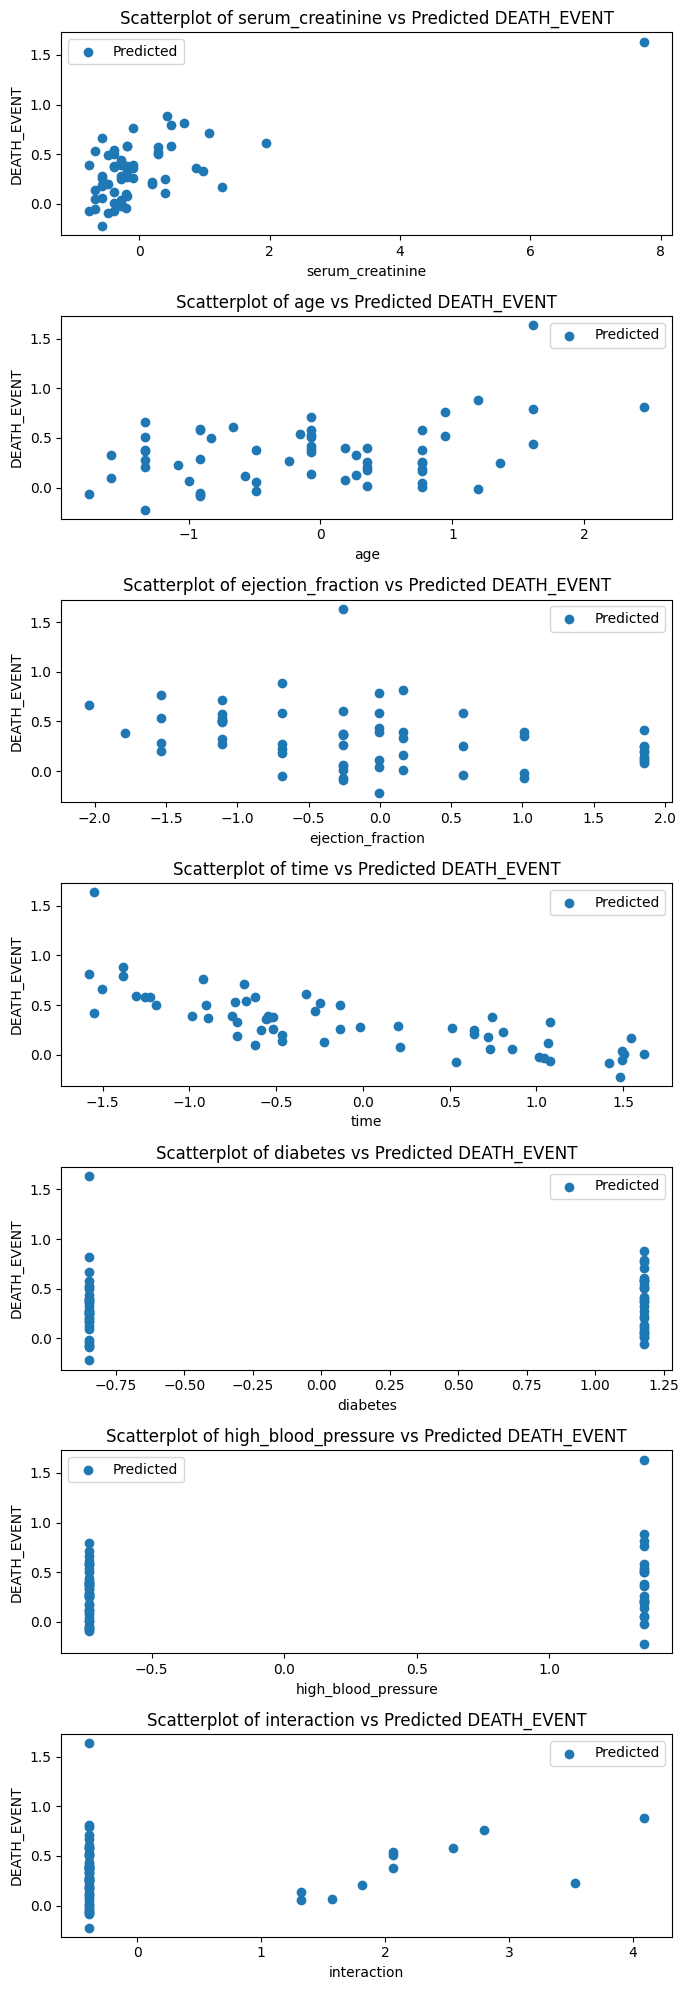

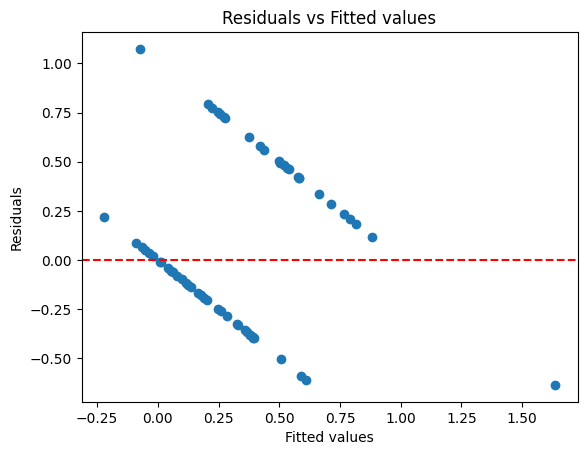

              Variable        VIF
0     serum_creatinine   2.903476
1                  age  11.678789
2    ejection_fraction   9.828716
3                 time   3.477328
4             diabetes   2.407241
5  high_blood_pressure   2.461886
6          interaction   2.340901


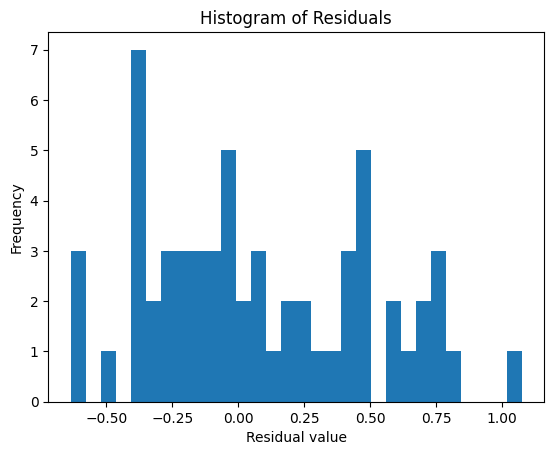

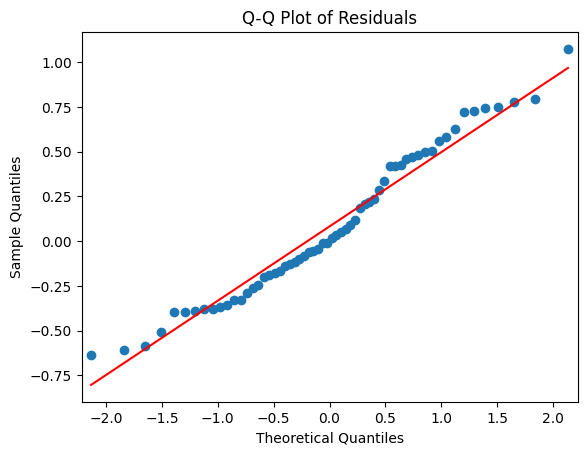

#2.4/2.5. Discuss the strengths and weaknesses of the Linear and Ridge Regression models for mortality prediction.


#The performance is nearly the same. All tests for linearity have similar results and the MSE is nearly the same (both were approximately 0.1787), and the residual vs. fitted plot suggests nonlinearity. The ridge regression may account for multicollineaty but not for potential outliers. Since most of the features that we chose for the OLS regression were somewhat important and there was not much multicollinearity), there was not much of an advantage over the OLS in terms of the model's residuals.

#Also, neither models account for nonlinearity; that is,  neither the OLS nor Ridge can capture non-linear relationships in their basic forms. We may need to consider more interaction terms, or transforming the predictor variables (i.e. using polynomial terms).


#3.1. Define a binary classification task to predict 'DEATH_EVENT.'


3.2. Apply Bayesian Classifier and Naive Bayes to predict 'DEATH_EVENT.'
:

3.3. Implement k-Nearest Neighbors (KNN) classification with the same target variable.


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# Read the dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Split your dataframe into features and target variable
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Initialize and fit the RandomForestClassifier
clf = RandomForestClassifier(max_features=X_train.shape[1], n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

# Predict and evaluate the model on test set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'The test set accuracy is {accuracy}')

# Get feature names
feature_names = X.columns

# Feature importance
feature_imp = pd.DataFrame(
    {'importance': clf.feature_importances_},
    index=feature_names
)
feature_imp = feature_imp.sort_values(by='importance', ascending=False)

print("Feature Importance:")
print(feature_imp)

# Initialize Gaussian Naive Bayes
gnb = GaussianNB()

# Fit the model
gnb.fit(X_train, y_train)

# Predict on test set
y_pred_gnb = gnb.predict(X_test)

# Evaluate the model
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
# Initialize Multinomial Naive Bayes
mnb = MultinomialNB()

# Fit the model
mnb.fit(X_train, y_train)

# Predict on test set
y_pred_mnb = mnb.predict(X_test)

# Evaluate the model
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
# Initialize k-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Evaluate the model's performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame(index=['Binary Classification(Random Forest)', 'Bayesian Classifier', 'Gaussian Naive Bayes', 'Multinomial Naive Bayes'],
                          columns=['Test Set Accuracy'])

# Insert RandomForestClassifier results
results_df.loc['Defining Binary Classification', 'Test Set Accuracy'] = accuracy

# Insert Bayesian Classifier (RandomForest) results
# Assuming Bayesian Classifier uses the same RandomForest as the first model
results_df.loc['Bayesian Classifier', 'Test Set Accuracy'] = accuracy

# Insert Gaussian Naive Bayes results
results_df.loc['Gaussian Naive Bayes', 'Test Set Accuracy'] = accuracy_gnb

# Insert Multinomial Naive Bayes results
results_df.loc['Multinomial Naive Bayes', 'Test Set Accuracy'] = accuracy_mnb

# KNN Nearest Neighbors
results_df.loc['k-Nearest Neighbors', 'Test Set Accuracy'] = accuracy_knn



print("4x4 Matrix of Test Set Accuracies and Feature Importances:")
print(results_df)


The test set accuracy is 0.775
Feature Importance:
                          importance
time                        0.488017
serum_creatinine            0.107036
age                         0.102134
creatinine_phosphokinase    0.092644
ejection_fraction           0.069519
platelets                   0.066482
serum_sodium                0.042974
anaemia                     0.010685
smoking                     0.006441
sex                         0.006282
high_blood_pressure         0.005402
diabetes                    0.002385
4x4 Matrix of Test Set Accuracies and Feature Importances:
                                     Test Set Accuracy
Binary Classification(Random Forest)               NaN
Bayesian Classifier                              0.775
Gaussian Naive Bayes                          0.758333
Multinomial Naive Bayes                           0.65
Defining Binary Classification                   0.775
k-Nearest Neighbors                           0.583333


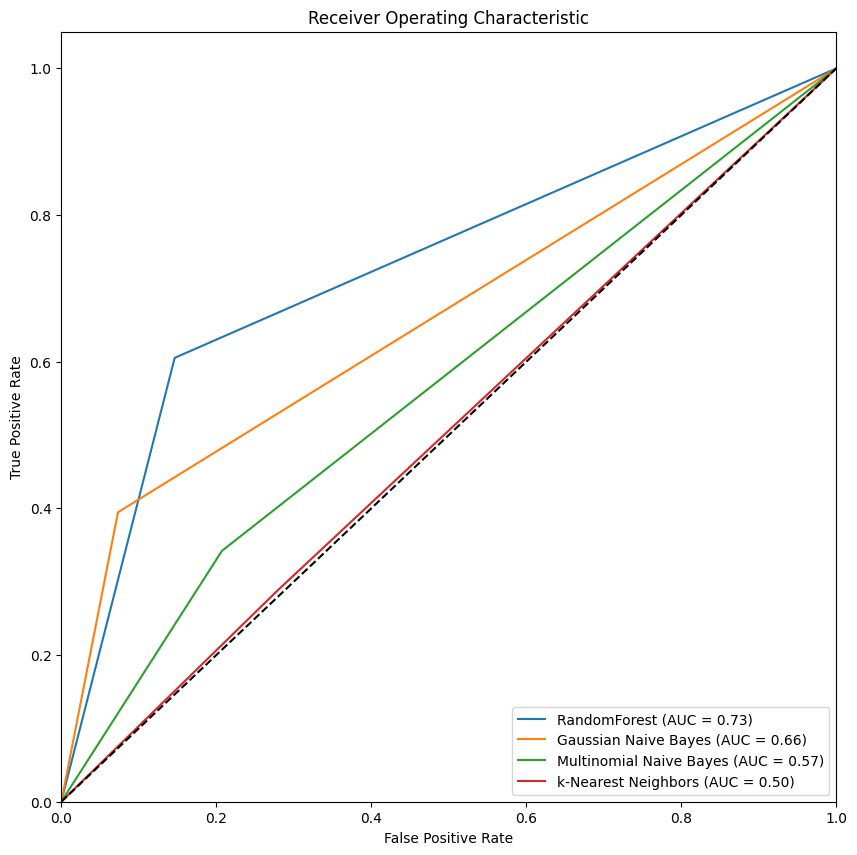

In [18]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Create a figure
plt.figure(figsize=(10, 10))

# RandomForestClassifier
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'RandomForest (AUC = {roc_auc:.2f})')

# Gaussian Naive Bayes
fpr, tpr, _ = roc_curve(y_test, y_pred_gnb)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Gaussian Naive Bayes (AUC = {roc_auc:.2f})')

# Multinomial Naive Bayes
fpr, tpr, _ = roc_curve(y_test, y_pred_mnb)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Multinomial Naive Bayes (AUC = {roc_auc:.2f})')

# k-Nearest Neighbors
fpr, tpr, _ = roc_curve(y_test, y_pred_knn)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'k-Nearest Neighbors (AUC = {roc_auc:.2f})')

# Plot configuration
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Show plot
plt.show()


#The above ROC curve shows that the test set might be too small under this implementation.Instead of splitting our data into test and training partitions,  we will split our dataset into k-folds. And run the performance/accuracy as the average of each fold below.  

In [22]:
from sklearn.model_selection import cross_val_score

# Read the dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Split your dataframe into features and target variable
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

# Number of folds
k = 5

# List of classifiers and their names
classifiers = [
    ("Random Forest", RandomForestClassifier(max_features=X.shape[1], n_estimators=100, random_state=0)),
    ("Gaussian Naive Bayes", GaussianNB()),
    ("Multinomial Naive Bayes", MultinomialNB()),
    ("k-Nearest Neighbors", KNeighborsClassifier(n_neighbors=5))
]

# Create an empty dictionary to store error rates
error_rates_dict = {}

# Iterate over each classifier and perform k-fold cross-validation
for name, clf in classifiers:
    scores = cross_val_score(clf, X, y, cv=k, scoring='accuracy')
    error_rates = 1 - scores

    # Store error rates to the dictionary
    error_rates_dict[name] = error_rates.tolist()

    print(f"{name} - {k}-fold Cross-Validation:")
    print(f"Accuracy scores for each of the {k} folds: {scores}")
    print(f"Error rates for each of the {k} folds: {error_rates}")
    print(f"Average accuracy: {scores.mean():.4f} ± {scores.std():.4f}")
    print(f"Average error rate: {error_rates.mean():.4f} ± {error_rates.std():.4f}\n")


Random Forest - 5-fold Cross-Validation:
Accuracy scores for each of the 5 folds: [0.4        0.85       0.75       0.61666667 0.6779661 ]
Error rates for each of the 5 folds: [0.6        0.15       0.25       0.38333333 0.3220339 ]
Average accuracy: 0.6589 ± 0.1510
Average error rate: 0.3411 ± 0.1510

Gaussian Naive Bayes - 5-fold Cross-Validation:
Accuracy scores for each of the 5 folds: [0.66666667 0.85       0.8        0.75       0.6779661 ]
Error rates for each of the 5 folds: [0.33333333 0.15       0.2        0.25       0.3220339 ]
Average accuracy: 0.7489 ± 0.0702
Average error rate: 0.2511 ± 0.0702

Multinomial Naive Bayes - 5-fold Cross-Validation:
Accuracy scores for each of the 5 folds: [0.61666667 0.58333333 0.7        0.71666667 0.66101695]
Error rates for each of the 5 folds: [0.38333333 0.41666667 0.3        0.28333333 0.33898305]
Average accuracy: 0.6555 ± 0.0499
Average error rate: 0.3445 ± 0.0499

k-Nearest Neighbors - 5-fold Cross-Validation:
Accuracy scores for each

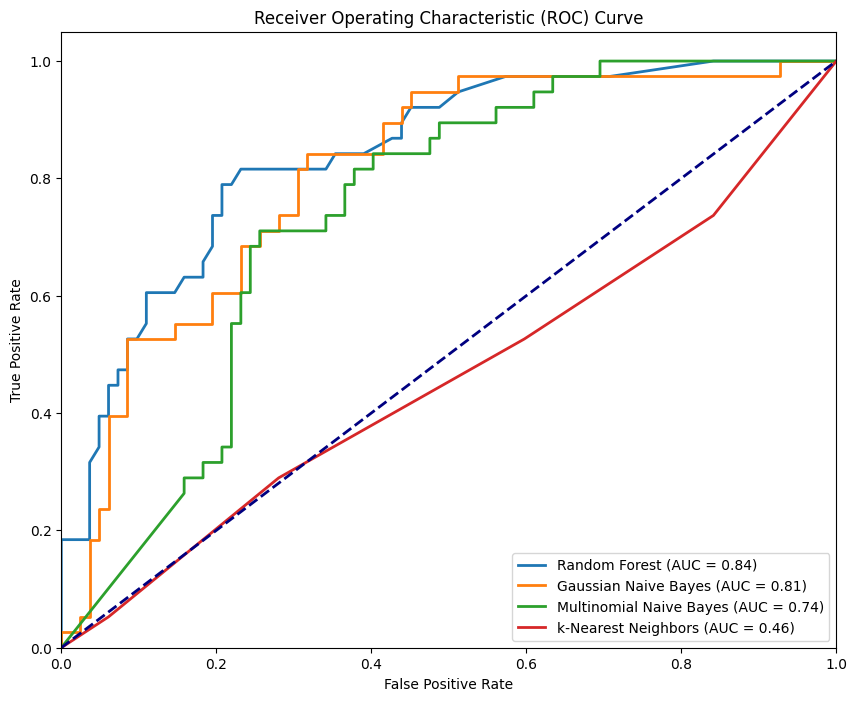

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Split the data into training and test sets (40% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Plot setup
plt.figure(figsize=(10, 8))

# Calculate ROC curve for each classifier
for name, clf in classifiers:
    # Fit the classifier
    clf.fit(X_train, y_train)
    # Predict the probabilities (keep the positive class only)
    y_pred_prob = clf.predict_proba(X_test)[:, 1]
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


#3.4. Evaluate the performance of each classification model using metrics such as accuracy.

With an AUC of 0.84, the Random Forest method performs the best among all four classifiers, just barely beating out the GNB classifier model. However, the results from the accuracy scores obtained from 5-fold cross validation for the four difference classifiers, shows that the random forest method has an extremely high average error rate and high variance across each fold (from 40% to 85%), which suggests that the model is sensitive to the splits of the data.

The Gausian Naive Bayes seemed to performed best overall, with its error rate being the lowest among the four. The accuracy scores across each fold are also more consistent than Random Forest.

K-NN classifier had the lowest average accuracy at 61.88% and the highest average error rate at 38.12%. These accuracy scores are pretty consistent across each fold.

#3.5. Discuss the suitability of each classification method for identifying patients at risk.

The random forest method has the benefit of capturing complex relationships in the data. However, it is not very consistent for prediction, as it is most likely leads to overfitting. It's strength lies in modeling complex relationships and feature importance scores as shown above.

Gaussian Naive Bayes assumes each feature are conditional independent given a target variable, which is a decent assumption under medical scenarios. This performed the best in terms of average accuracy and low test error rate. The issue with Gaussian Naive Bayes is it may not capture these complex relationships as did random forest given that the assumuption of conditionallity independent features given a target variable may not hold true for interedependencies between features. When testing for interaction terms in the multiple linear regression, we found a lot of possible candidates for interaction variables.

K-NN performed the worse, as it is not only computationally intensive for large datasets but requires a lot of scaling and parameter optimization (as shown in the first question, where we used K-Means with gower's distance on top of scaling),  since the k-NN algorithm does not work as well as the others when working with mixed datasets (datasets with both binary and continuous features). We could of course alter the distance metric (which uses the euclidean distance by default) to other metrics to others as a possible optimization method, but in this scenario it is better to use either Gaussian NaiveBayers for prediction, and random forest method for inference and examination of complex relationships.


#Conclusion: Summarize the findings and insights from the clustering, regression, and classification analyses. Discuss the clinical relevance of the results and how each technique contributes to mortality prediction in cardiovascular medicine.





I found that the clustering method is absolutely horrible for making predictions but quite intuitive as a method for determining reasonable associations in the dataset. Determining the number of clusters relied more on examining the overall interpretability of the clusters instead of using the elbow method or any other metrics in my opinion - when I increased the cluster number to approximately 17, I was able to see some nice complex relationships (i.e. cluster 9 consisters of patients that where predominantly male, non-diabetic, anaemia, no high blood pressure, non-smokers). Using these findings help figure out which interaction terms and features to use for multiple linear regression.                                          

I did not find using multiple linear regression to be very useful for making predictions -after examining the residual vs fitted plot of both the ridge regression and the multiple linear regression, the lack of complete randomness from left to right lends me to not trust this method, and attempt (in the future that is) a non-linear regression model instead. There are also a small cluster of patients that could disguise itself as outliers in the linear regression models to have a misleading effect on the model as well.


In the realm of cardiovascular medicine, particularly concerning the prediction of mortality rates, many of the methods discussed may have limited predictive power. Given the intricacies of cardiovascular diseases, controlled clinical trials, which include both placebo and treatment arms, are essential to ascertain the efficacy of any treatment. The data in question lacks crucial details, such as the context of patient tests, which is pivotal considering the variability in summary medical data across different regions, particularly between rural and urban settings.

Much of the methodologies employed in our discussions align more with exploratory data analysis. If a physician observes certain trends or anomalies in patient outcomes, they might collaborate with a hospital data analyst to validate their observations. This preliminary analysis is often a precursor to more resource-intensive clinical trials. It's worth noting that specialists, like oncologists, are routinely encouraged to participate in annual research, making such collaborations rather common in nature. When it comes to clinical trials, survival analysis is typically the go-to method, given its relevance and robustness in analyzing time-to-event data.


